In [1]:
import os
import pickle

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers

import pylab
import matplotlib.pyplot as plt

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [3]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)
num_ch_c1 = 50  # Question 2
num_ch_c2 = 60  # Question 2

epochs = 1000  # Fixed
batch_size = 128  # Fixed
learning_rate = 0.001

# Fixed, no need change
def load_data(file):
    with open(file, 'rb') as fo:
        try:
            samples = pickle.load(fo)
        except UnicodeDecodeError:  # python 3.x
            fo.seek(0)
            samples = pickle.load(fo, encoding='latin1')

    data, labels = samples['data'], samples['labels']

    data = np.array(data, dtype=np.float32) / 255
    labels = np.array(labels, dtype=np.int32)
    return data, labels

# Training and test
x_train, y_train = load_data('data_batch_1')
x_test, y_test = load_data('test_batch_trim')

#idx1 = np.arange(x_train.shape[0])
#np.random.shuffle(idx1)
#x_train, y_train = x_train[idx1], y_train[idx1]

#idx2 = np.arange(x_test.shape[0])
#np.random.shuffle(idx2)
#x_test, y_test = x_test[idx2], y_test[idx2]

In [4]:
x_train.shape

(10000, 3072)

In [5]:
x_train

array([[0.23137255, 0.16862746, 0.19607843, ..., 0.54901963, 0.32941177,
        0.28235295],
       [0.6039216 , 0.49411765, 0.4117647 , ..., 0.54509807, 0.5568628 ,
        0.5647059 ],
       [1.        , 0.99215686, 0.99215686, ..., 0.3254902 , 0.3254902 ,
        0.32941177],
       ...,
       [0.2784314 , 0.23529412, 0.2901961 , ..., 0.26666668, 0.27058825,
        0.26666668],
       [0.98039216, 0.99607843, 0.827451  , ..., 0.84313726, 1.        ,
        0.99607843],
       [0.24313726, 0.23921569, 0.23529412, ..., 0.50980395, 0.50980395,
        0.5137255 ]], dtype=float32)

In [6]:
x_test

array([[0.8509804 , 0.8352941 , 0.85490197, ..., 0.8392157 , 0.8392157 ,
        0.84313726],
       [0.32941177, 0.34117648, 0.34509805, ..., 0.32156864, 0.31764707,
        0.31764707],
       [0.33333334, 0.32941177, 0.30980393, ..., 0.4       , 0.42745098,
        0.30980393],
       ...,
       [0.32941177, 0.31764707, 0.30980393, ..., 0.8862745 , 0.8745098 ,
        0.8862745 ],
       [0.21960784, 0.3019608 , 0.27058825, ..., 0.67058825, 0.654902  ,
        0.6627451 ],
       [0.2       , 0.32156864, 0.38431373, ..., 0.21568628, 0.17254902,
        0.16470589]], dtype=float32)

## Part A: Object Recognition Question 1

In [7]:
model = tf.keras.Sequential()
model.add(layers.Input(shape=(3072, )))
model.add(layers.Reshape(target_shape=(32, 32, 3), input_shape=(3072,)))
model.add(layers.Conv2D(num_ch_c1, 9, activation='relu', input_shape=(None, None, 3), padding="valid"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))
model.add(layers.Conv2D(num_ch_c2, 5, activation='relu', input_shape=(None, None, 3), padding="valid"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))
model.add(layers.Flatten())
model.add(layers.Dense(300, activation = None))
model.add(layers.Dense(10, use_bias=True, input_shape=(300,)))
          
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 24, 24, 50)        12200     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 50)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 60)          75060     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 60)          0         
_________________________________________________________________
flatten (Flatten)            (None, 960)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               2

In [8]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss=loss, metrics='accuracy')
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test))

Epoch 1/1000
79/79 [==============================] - 1s 11ms/step - loss: 2.3122 - accuracy: 0.1059 - val_loss: 2.2994 - val_accuracy: 0.1300
Epoch 2/1000
79/79 [==============================] - 1s 8ms/step - loss: 2.2953 - accuracy: 0.1255 - val_loss: 2.2893 - val_accuracy: 0.1290
Epoch 3/1000
79/79 [==============================] - 1s 8ms/step - loss: 2.2863 - accuracy: 0.1331 - val_loss: 2.2818 - val_accuracy: 0.1370
Epoch 4/1000
79/79 [==============================] - 1s 8ms/step - loss: 2.2792 - accuracy: 0.1389 - val_loss: 2.2756 - val_accuracy: 0.1520
Epoch 5/1000
79/79 [==============================] - 1s 8ms/step - loss: 2.2728 - accuracy: 0.1484 - val_loss: 2.2693 - val_accuracy: 0.1640
Epoch 6/1000
79/79 [==============================] - 1s 7ms/step - loss: 2.2661 - accuracy: 0.1619 - val_loss: 2.2628 - val_accuracy: 0.1760
Epoch 7/1000
79/79 [==============================] - 1s 8ms/step - loss: 2.2588 - accuracy: 0.1721 - val_loss: 2.2555 - val_accuracy: 0.1875
Epoch

79/79 [==============================] - 1s 8ms/step - loss: 1.7204 - accuracy: 0.3925 - val_loss: 1.7695 - val_accuracy: 0.3660
Epoch 116/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.7174 - accuracy: 0.3950 - val_loss: 1.7476 - val_accuracy: 0.4020
Epoch 117/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.7141 - accuracy: 0.3937 - val_loss: 1.7444 - val_accuracy: 0.3915
Epoch 118/1000
79/79 [==============================] - 1s 8ms/step - loss: 1.7122 - accuracy: 0.3950 - val_loss: 1.7393 - val_accuracy: 0.3830
Epoch 119/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.7099 - accuracy: 0.4002 - val_loss: 1.7326 - val_accuracy: 0.4000
Epoch 120/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.7084 - accuracy: 0.3971 - val_loss: 1.7370 - val_accuracy: 0.3940
Epoch 121/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.7064 - accuracy: 0.3969 - val_loss: 1.7297 - val_accuracy: 0.4000
Epoch 1

Epoch 172/1000
79/79 [==============================] - 1s 8ms/step - loss: 1.6072 - accuracy: 0.4357 - val_loss: 1.6528 - val_accuracy: 0.4240
Epoch 173/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.6062 - accuracy: 0.4377 - val_loss: 1.7075 - val_accuracy: 0.3945
Epoch 174/1000
79/79 [==============================] - 1s 8ms/step - loss: 1.6056 - accuracy: 0.4383 - val_loss: 1.6385 - val_accuracy: 0.4265
Epoch 175/1000
79/79 [==============================] - 1s 8ms/step - loss: 1.6046 - accuracy: 0.4388 - val_loss: 1.7637 - val_accuracy: 0.3760
Epoch 176/1000
79/79 [==============================] - 1s 8ms/step - loss: 1.6076 - accuracy: 0.4382 - val_loss: 1.6454 - val_accuracy: 0.4260
Epoch 177/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.5992 - accuracy: 0.4393 - val_loss: 1.6737 - val_accuracy: 0.4000
Epoch 178/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.5987 - accuracy: 0.4422 - val_loss: 1.6849 - val_accuracy:

Epoch 229/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.5230 - accuracy: 0.4688 - val_loss: 2.0761 - val_accuracy: 0.3300
Epoch 230/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.5226 - accuracy: 0.4676 - val_loss: 1.5765 - val_accuracy: 0.4495
Epoch 231/1000
79/79 [==============================] - 1s 8ms/step - loss: 1.5156 - accuracy: 0.4705 - val_loss: 1.6411 - val_accuracy: 0.4260
Epoch 232/1000
79/79 [==============================] - 1s 8ms/step - loss: 1.5155 - accuracy: 0.4686 - val_loss: 1.6304 - val_accuracy: 0.4145
Epoch 233/1000
79/79 [==============================] - 1s 8ms/step - loss: 1.5123 - accuracy: 0.4702 - val_loss: 1.7336 - val_accuracy: 0.3960
Epoch 234/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.5138 - accuracy: 0.4731 - val_loss: 1.6502 - val_accuracy: 0.4290
Epoch 235/1000
79/79 [==============================] - 1s 8ms/step - loss: 1.5124 - accuracy: 0.4710 - val_loss: 1.7837 - val_accuracy:

Epoch 286/1000
79/79 [==============================] - 1s 8ms/step - loss: 1.4462 - accuracy: 0.4966 - val_loss: 1.5245 - val_accuracy: 0.4710
Epoch 287/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4412 - accuracy: 0.4986 - val_loss: 1.6512 - val_accuracy: 0.4145
Epoch 288/1000
79/79 [==============================] - 1s 8ms/step - loss: 1.4454 - accuracy: 0.5010 - val_loss: 1.5457 - val_accuracy: 0.4640
Epoch 289/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4377 - accuracy: 0.4983 - val_loss: 1.5353 - val_accuracy: 0.4595
Epoch 290/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4380 - accuracy: 0.5009 - val_loss: 1.5469 - val_accuracy: 0.4705
Epoch 291/1000
79/79 [==============================] - 1s 8ms/step - loss: 1.4375 - accuracy: 0.5015 - val_loss: 1.6601 - val_accuracy: 0.4235
Epoch 292/1000
79/79 [==============================] - 1s 8ms/step - loss: 1.4347 - accuracy: 0.4988 - val_loss: 1.5405 - val_accuracy:

Epoch 343/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3792 - accuracy: 0.5219 - val_loss: 1.5223 - val_accuracy: 0.4745
Epoch 344/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3776 - accuracy: 0.5188 - val_loss: 1.8342 - val_accuracy: 0.3655
Epoch 345/1000
79/79 [==============================] - 1s 8ms/step - loss: 1.3861 - accuracy: 0.5236 - val_loss: 1.4829 - val_accuracy: 0.4915
Epoch 346/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3766 - accuracy: 0.5237 - val_loss: 1.5386 - val_accuracy: 0.4610
Epoch 347/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3731 - accuracy: 0.5231 - val_loss: 1.5158 - val_accuracy: 0.4595
Epoch 348/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3719 - accuracy: 0.5265 - val_loss: 1.5997 - val_accuracy: 0.4340
Epoch 349/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3736 - accuracy: 0.5279 - val_loss: 1.6472 - val_accuracy:

Epoch 456/1000
79/79 [==============================] - 1s 8ms/step - loss: 1.2687 - accuracy: 0.5594 - val_loss: 1.6644 - val_accuracy: 0.4140
Epoch 457/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2702 - accuracy: 0.5618 - val_loss: 1.5122 - val_accuracy: 0.4640
Epoch 458/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2673 - accuracy: 0.5601 - val_loss: 1.5021 - val_accuracy: 0.4925
Epoch 459/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2622 - accuracy: 0.5623 - val_loss: 1.4628 - val_accuracy: 0.4935
Epoch 460/1000
79/79 [==============================] - 1s 8ms/step - loss: 1.2608 - accuracy: 0.5648 - val_loss: 1.6128 - val_accuracy: 0.4360
Epoch 461/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2706 - accuracy: 0.5604 - val_loss: 1.7547 - val_accuracy: 0.4000
Epoch 462/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2645 - accuracy: 0.5650 - val_loss: 1.5665 - val_accuracy:

Epoch 513/1000
79/79 [==============================] - 1s 8ms/step - loss: 1.2178 - accuracy: 0.5784 - val_loss: 1.4528 - val_accuracy: 0.5020
Epoch 514/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2156 - accuracy: 0.5780 - val_loss: 1.4381 - val_accuracy: 0.5015
Epoch 515/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2111 - accuracy: 0.5825 - val_loss: 1.4883 - val_accuracy: 0.4935
Epoch 516/1000
79/79 [==============================] - 1s 8ms/step - loss: 1.2125 - accuracy: 0.5799 - val_loss: 1.4737 - val_accuracy: 0.4960
Epoch 517/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2074 - accuracy: 0.5859 - val_loss: 1.6554 - val_accuracy: 0.4285
Epoch 518/1000
79/79 [==============================] - 1s 8ms/step - loss: 1.2171 - accuracy: 0.5805 - val_loss: 1.5241 - val_accuracy: 0.4605
Epoch 519/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2040 - accuracy: 0.5858 - val_loss: 1.5066 - val_accuracy:

Epoch 570/1000
79/79 [==============================] - 1s 8ms/step - loss: 1.1614 - accuracy: 0.6006 - val_loss: 1.5149 - val_accuracy: 0.4875
Epoch 571/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1626 - accuracy: 0.5987 - val_loss: 1.4464 - val_accuracy: 0.4880
Epoch 572/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1654 - accuracy: 0.5980 - val_loss: 1.5577 - val_accuracy: 0.4615
Epoch 573/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1631 - accuracy: 0.6012 - val_loss: 1.4422 - val_accuracy: 0.5060
Epoch 574/1000
79/79 [==============================] - 1s 8ms/step - loss: 1.1565 - accuracy: 0.6002 - val_loss: 1.4810 - val_accuracy: 0.4815
Epoch 575/1000
79/79 [==============================] - 1s 8ms/step - loss: 1.1636 - accuracy: 0.5972 - val_loss: 1.4796 - val_accuracy: 0.4810
Epoch 576/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1669 - accuracy: 0.5992 - val_loss: 1.6321 - val_accuracy:

Epoch 627/1000
79/79 [==============================] - 1s 8ms/step - loss: 1.1105 - accuracy: 0.6192 - val_loss: 1.4629 - val_accuracy: 0.4895
Epoch 628/1000
79/79 [==============================] - 1s 8ms/step - loss: 1.1093 - accuracy: 0.6155 - val_loss: 1.5089 - val_accuracy: 0.4630
Epoch 629/1000
79/79 [==============================] - 1s 8ms/step - loss: 1.1151 - accuracy: 0.6166 - val_loss: 1.5452 - val_accuracy: 0.4735
Epoch 630/1000
79/79 [==============================] - 1s 8ms/step - loss: 1.1117 - accuracy: 0.6188 - val_loss: 1.4872 - val_accuracy: 0.4955
Epoch 631/1000
79/79 [==============================] - 1s 8ms/step - loss: 1.1095 - accuracy: 0.6180 - val_loss: 1.4302 - val_accuracy: 0.4925
Epoch 632/1000
79/79 [==============================] - 1s 8ms/step - loss: 1.1055 - accuracy: 0.6219 - val_loss: 1.5179 - val_accuracy: 0.4695
Epoch 633/1000
79/79 [==============================] - 1s 8ms/step - loss: 1.1040 - accuracy: 0.6189 - val_loss: 1.4555 - val_accuracy:

Epoch 684/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0591 - accuracy: 0.6408 - val_loss: 1.5347 - val_accuracy: 0.4685
Epoch 685/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0553 - accuracy: 0.6387 - val_loss: 1.6734 - val_accuracy: 0.4435
Epoch 686/1000
79/79 [==============================] - 1s 8ms/step - loss: 1.0603 - accuracy: 0.6331 - val_loss: 1.5740 - val_accuracy: 0.4780
Epoch 687/1000
79/79 [==============================] - 1s 8ms/step - loss: 1.0548 - accuracy: 0.6370 - val_loss: 1.5257 - val_accuracy: 0.4955
Epoch 688/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0621 - accuracy: 0.6359 - val_loss: 1.7539 - val_accuracy: 0.4250
Epoch 689/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0550 - accuracy: 0.6354 - val_loss: 1.8703 - val_accuracy: 0.3910
Epoch 690/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0547 - accuracy: 0.6396 - val_loss: 1.5252 - val_accuracy:

Epoch 797/1000
79/79 [==============================] - 1s 8ms/step - loss: 0.9486 - accuracy: 0.6781 - val_loss: 1.7084 - val_accuracy: 0.4415
Epoch 798/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9510 - accuracy: 0.6779 - val_loss: 1.4999 - val_accuracy: 0.4845
Epoch 799/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9490 - accuracy: 0.6778 - val_loss: 1.5112 - val_accuracy: 0.4795
Epoch 800/1000
79/79 [==============================] - 1s 8ms/step - loss: 0.9499 - accuracy: 0.6743 - val_loss: 1.6243 - val_accuracy: 0.4675
Epoch 801/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9473 - accuracy: 0.6795 - val_loss: 1.4342 - val_accuracy: 0.5265
Epoch 802/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9453 - accuracy: 0.6808 - val_loss: 1.4895 - val_accuracy: 0.4940
Epoch 803/1000
79/79 [==============================] - 1s 8ms/step - loss: 0.9424 - accuracy: 0.6822 - val_loss: 1.5956 - val_accuracy:

Epoch 854/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8957 - accuracy: 0.6966 - val_loss: 1.6938 - val_accuracy: 0.4475
Epoch 855/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8955 - accuracy: 0.6986 - val_loss: 1.4967 - val_accuracy: 0.5080
Epoch 856/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8949 - accuracy: 0.6966 - val_loss: 1.6844 - val_accuracy: 0.4510
Epoch 857/1000
79/79 [==============================] - 1s 8ms/step - loss: 0.8903 - accuracy: 0.7004 - val_loss: 1.5064 - val_accuracy: 0.4900
Epoch 858/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8911 - accuracy: 0.6995 - val_loss: 1.4164 - val_accuracy: 0.5175
Epoch 859/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8879 - accuracy: 0.7018 - val_loss: 1.4967 - val_accuracy: 0.4940
Epoch 860/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8925 - accuracy: 0.7006 - val_loss: 1.6098 - val_accuracy:

Epoch 911/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8433 - accuracy: 0.7199 - val_loss: 1.4850 - val_accuracy: 0.5015
Epoch 912/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8392 - accuracy: 0.7190 - val_loss: 1.4676 - val_accuracy: 0.5065
Epoch 913/1000
79/79 [==============================] - 1s 8ms/step - loss: 0.8393 - accuracy: 0.7211 - val_loss: 1.6113 - val_accuracy: 0.4680
Epoch 914/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8421 - accuracy: 0.7174 - val_loss: 1.6228 - val_accuracy: 0.4710
Epoch 915/1000
79/79 [==============================] - 1s 8ms/step - loss: 0.8391 - accuracy: 0.7207 - val_loss: 1.7193 - val_accuracy: 0.4680
Epoch 916/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8431 - accuracy: 0.7184 - val_loss: 1.6227 - val_accuracy: 0.4655
Epoch 917/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8368 - accuracy: 0.7215 - val_loss: 1.5415 - val_accuracy:

Epoch 968/1000
79/79 [==============================] - 1s 8ms/step - loss: 0.7833 - accuracy: 0.7397 - val_loss: 1.7278 - val_accuracy: 0.4535
Epoch 969/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7837 - accuracy: 0.7398 - val_loss: 1.7563 - val_accuracy: 0.4475
Epoch 970/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7844 - accuracy: 0.7417 - val_loss: 1.5376 - val_accuracy: 0.5015
Epoch 971/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7775 - accuracy: 0.7446 - val_loss: 1.5607 - val_accuracy: 0.5000
Epoch 972/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7764 - accuracy: 0.7426 - val_loss: 1.6111 - val_accuracy: 0.4810
Epoch 973/1000
79/79 [==============================] - 1s 8ms/step - loss: 0.7810 - accuracy: 0.7401 - val_loss: 1.5613 - val_accuracy: 0.4925
Epoch 974/1000
79/79 [==============================] - 1s 8ms/step - loss: 0.7794 - accuracy: 0.7420 - val_loss: 1.6504 - val_accuracy:

In [9]:
if not os.path.exists('./models'):
    os.mkdir('./models')
if not os.path.exists('./results'):
    os.mkdir('./results')
        
model.save('models/qn_1a.h5')

In [10]:
mean_acc = np.mean(history.history['val_accuracy'][-10:])
print("mean accuracy for last 10 epochs: " + str(mean_acc*100) +"%")

mean accuracy for last 10 epochs: 47.874999940395355%


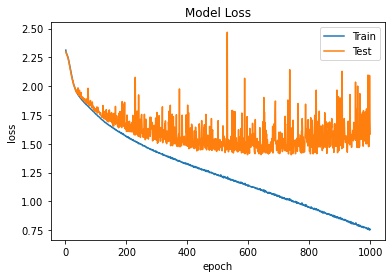

In [11]:
# Save the plot for losses
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Test')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

plt.savefig(
    f'./results/{num_ch_c1}_{num_ch_c2}_SGD_1a_loss.pdf'
)

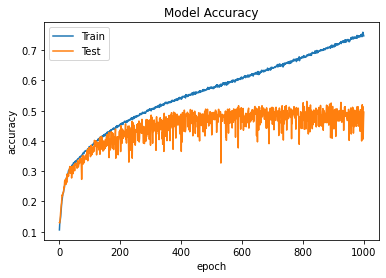

In [12]:
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Train')
plt.plot(range(1, len(test_acc) + 1), test_acc, label='Test')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

plt.savefig(
    f'./results/{num_ch_c1}_{num_ch_c2}_SGD_1a_accuracy.pdf'
)

In [13]:
x_test.shape

(2000, 3072)

In [14]:
model.layers

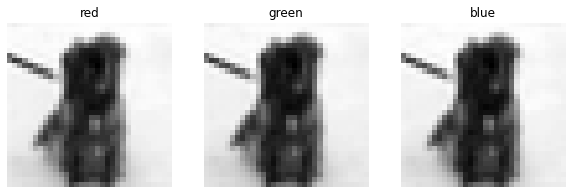

In [34]:
# test image 1
x = []
x1 = x_test[0,0:1024]
x1 = x1.reshape(32,32)
x.append(x1)
x2 = x_test[0,1024:2048]
x2 = x2.reshape(32,32)
x.append(x2)
x3 = x_test[0,2048:3072]
x3 = x3.reshape(32,32)
x.append(x3)
fig = plt.figure(figsize=(10, 15))
columns = 3
rows = 1
channels = ['red','green','blue']
ax = []
for i in range(columns*rows):
    img = x[i]
    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title(channels[i])  # set title
    plt.axis('off'),plt.imshow(img)
    
plt.gray()
plt.show()

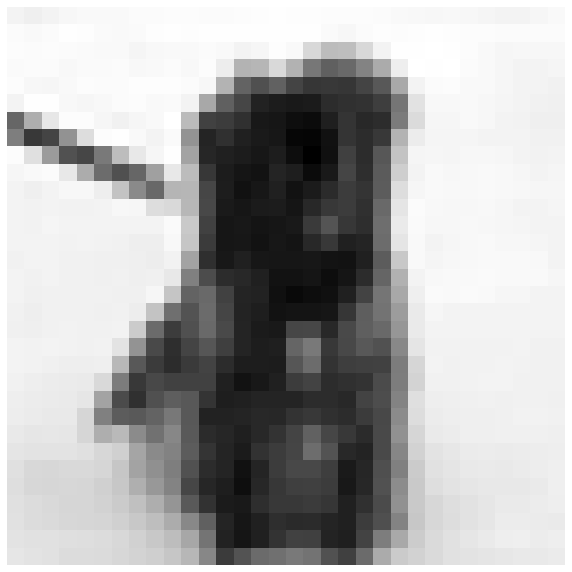

In [16]:
# test image 1
x1 = x_test[0,0:1024]
x1 = x1.reshape(32,32)

x2 = x_test[0,1024:2048]
x2 = x2.reshape(32,32)

x3 = x_test[0,2048:3072]
x3 = x3.reshape(32,32)

x = np.add(x1, x2)
x = np.add(x, x3)

plt.figure(figsize=(10, 15))
plt.gray()
plt.axis('off'); D
plt.imshow(x)
plt.savefig(
    f'./results/{num_ch_c1}_{num_ch_c2}_SGD_1a_test1.pdf'
)

(1, 24, 24, 50)


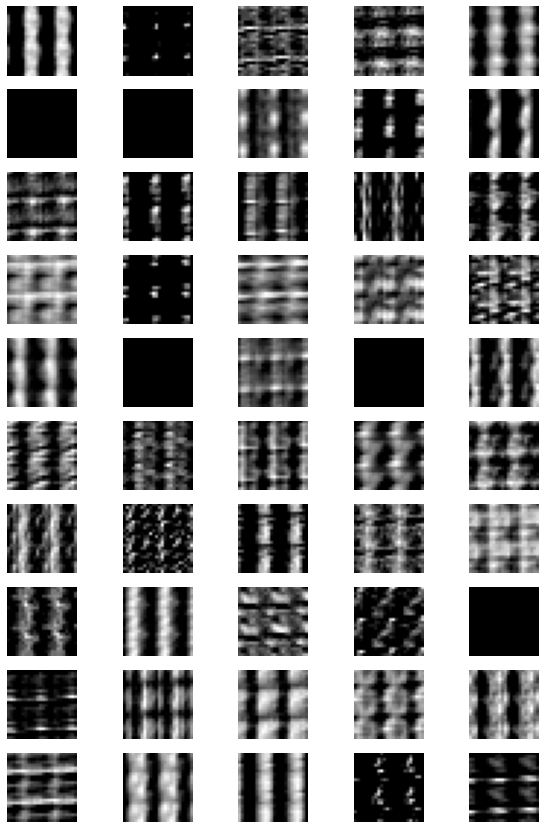

In [22]:
ax = []
# Show feature map at conv1
x = x_test[0,:].reshape(1,32,32,3)
conv1 = model.layers[1]
conv1 = conv1(x)

conv1 = np.array(conv1)
print(conv1.shape)
fig = plt.figure(figsize=(10, 15))
columns = 5
rows = 10
for i in range(columns*rows):
    img = conv1[0,:,:,i]
    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns, i+1) )
    plt.axis('off'),plt.imshow(img)
    
plt.gray()
plt.show()

(1, 12, 12, 50)


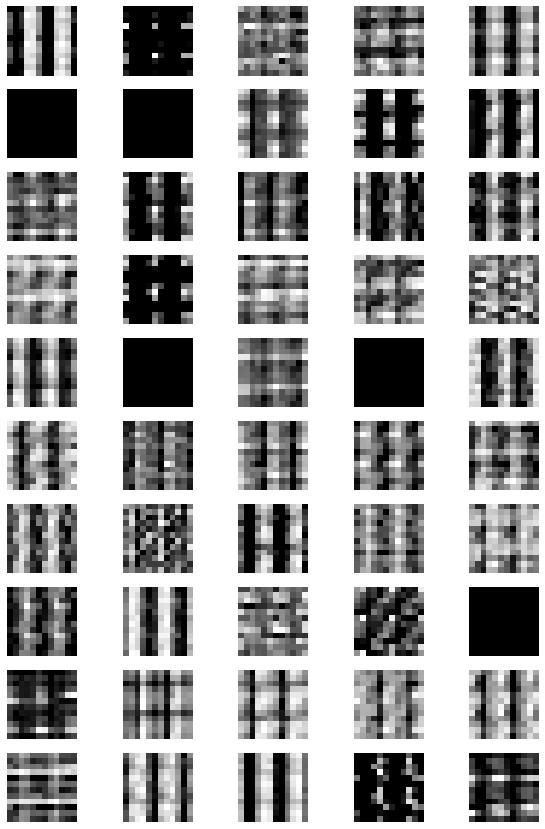

In [23]:
# Show feature map at pooling layer 1
x = x_test[0,:].reshape(1,32,32,3)
conv1 = model.layers[1]
conv1 = conv1(x)
pool1 = model.layers[2]
pool1 = pool1(conv1)

pool1 = np.array(pool1)
print(pool1.shape)
fig = plt.figure(figsize=(10, 15))
columns = 5
rows = 10
for i in range(columns*rows):
    img = pool1[0,:,:,i]
    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns, i+1) )
    plt.axis('off'),plt.imshow(img)
    
plt.gray()
plt.show()

(1, 8, 8, 60)


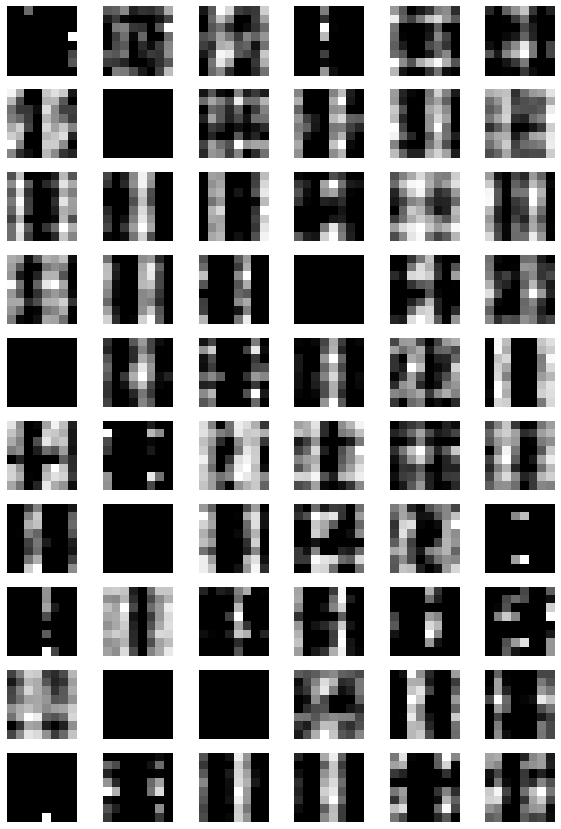

In [24]:
# Show feature map at conv layer 2
x = x_test[0,:].reshape(1,32,32,3)
conv1 = model.layers[1]
conv1 = conv1(x)
pool1 = model.layers[2]
pool1 = pool1(conv1)
conv2 = model.layers[3]
conv2 = conv2(pool1)

conv2 = np.array(conv2)
print(conv2.shape)
fig = plt.figure(figsize=(10, 15))
columns = 6
rows = 10
for i in range(columns*rows):
    img = conv2[0,:,:,i]
    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns, i+1) )
    plt.axis('off'),plt.imshow(img)
    
plt.gray()
plt.show()

(1, 4, 4, 60)


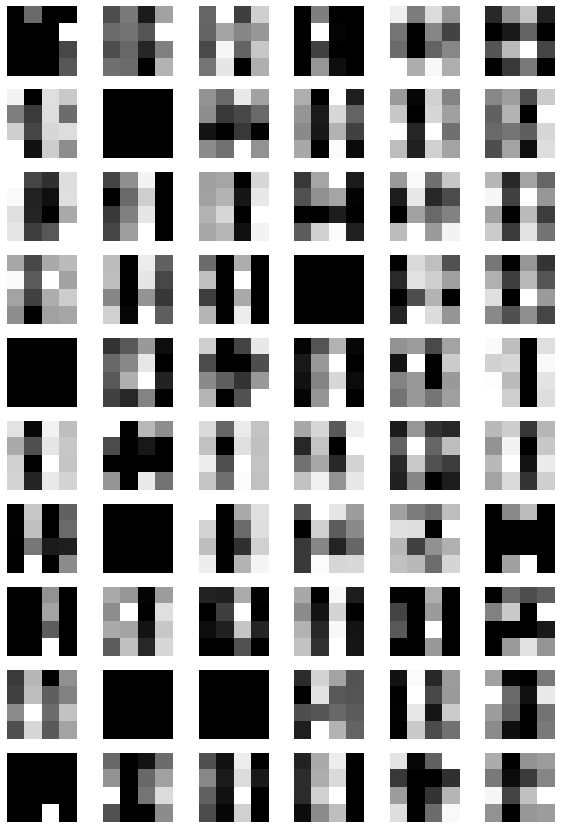

In [25]:
# Show feature map at pooling layer 2
x = x_test[0,:].reshape(1,32,32,3)
conv1 = model.layers[1]
conv1 = conv1(x)
pool1 = model.layers[2]
pool1 = pool1(conv1)
conv2 = model.layers[3]
conv2 = conv2(pool1)
pool2 = model.layers[4]
pool2 = pool2(conv2)

pool2 = np.array(pool2)
print(pool2.shape)
fig = plt.figure(figsize=(10, 15))
columns = 6
rows = 10
for i in range(columns*rows):
    img = pool2[0,:,:,i]
    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns, i+1) )
    plt.axis('off'),plt.imshow(img)
    
plt.gray()
plt.show()

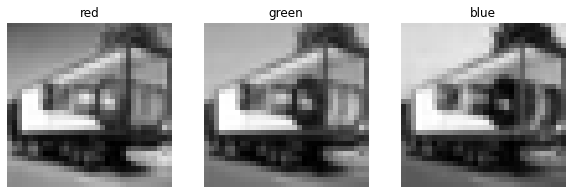

In [26]:
# test image 2
x = []
x1 = x_test[1,0:1024]
x1 = x1.reshape(32,32)
x.append(x1)
x2 = x_test[1,1024:2048]
x2 = x2.reshape(32,32)
x.append(x2)
x3 = x_test[1,2048:3072]
x3 = x3.reshape(32,32)
x.append(x3)
fig = plt.figure(figsize=(10, 15))
columns = 3
rows = 1
channels = ['red','green','blue']
ax = []
for i in range(columns*rows):
    img = x[i]
    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title(channels[i])  # set title
    plt.axis('off'),plt.imshow(img)
    
plt.gray()
plt.show()

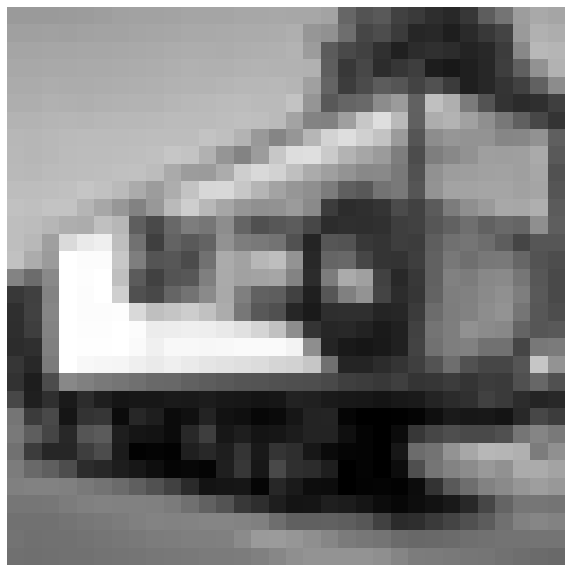

In [27]:
# test image 1
x1 = x_test[1,0:1024]
x1 = x1.reshape(32,32)

x2 = x_test[1,1024:2048]
x2 = x2.reshape(32,32)

x3 = x_test[1,2048:3072]
x3 = x3.reshape(32,32)

x = np.add(x1, x2)
x = np.add(x, x3)

plt.figure(figsize=(10, 15))
plt.gray()
plt.axis('off'); 
plt.imshow(x)
plt.savefig(
    f'./results/{num_ch_c1}_{num_ch_c2}_SGD_1a_test2.pdf'
)

(1, 24, 24, 50)


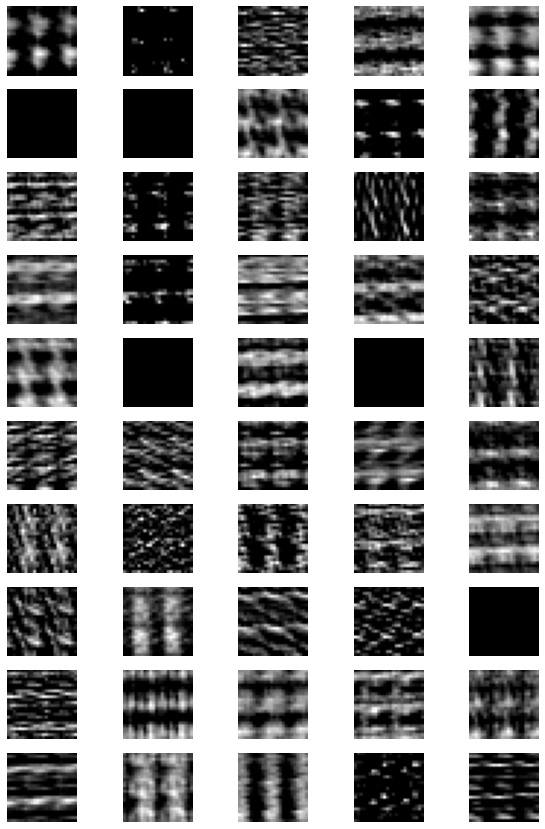

In [28]:
# Show feature map at conv1
x = x_test[1,:].reshape(1,32,32,3)
conv1 = model.layers[1]
conv1 = conv1(x)

conv1 = np.array(conv1)
print(conv1.shape)
fig = plt.figure(figsize=(10, 15))
columns = 5
rows = 10
for i in range(columns*rows):
    img = conv1[0,:,:,i]
    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns, i+1) )
    plt.axis('off'),plt.imshow(img)
    
plt.gray()
plt.show()

(1, 12, 12, 50)


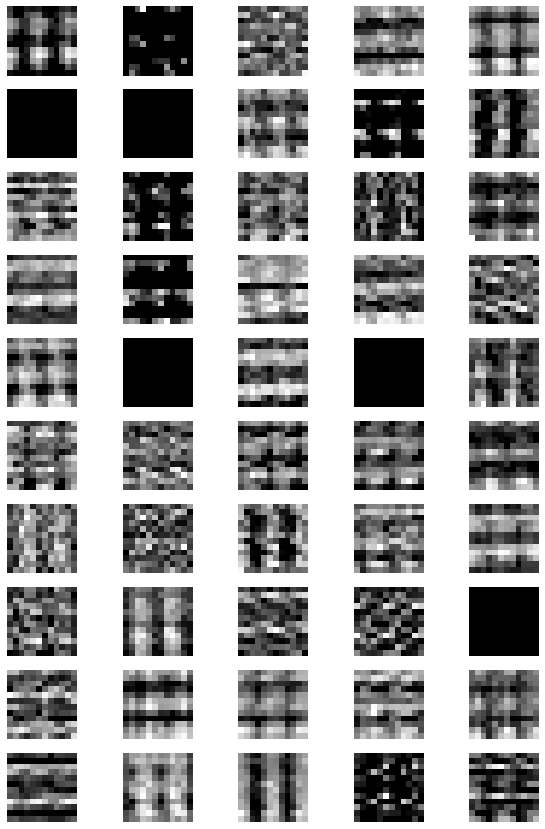

In [29]:
# Show feature map at pooling layer 1
x = x_test[1,:].reshape(1,32,32,3)
conv1 = model.layers[1]
conv1 = conv1(x)
pool1 = model.layers[2]
pool1 = pool1(conv1)

pool1 = np.array(pool1)
print(pool1.shape)
fig = plt.figure(figsize=(10, 15))
columns = 5
rows = 10
for i in range(columns*rows):
    img = pool1[0,:,:,i]
    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns, i+1) )
    plt.axis('off'),plt.imshow(img)
    
plt.gray()
plt.show()

(1, 8, 8, 60)


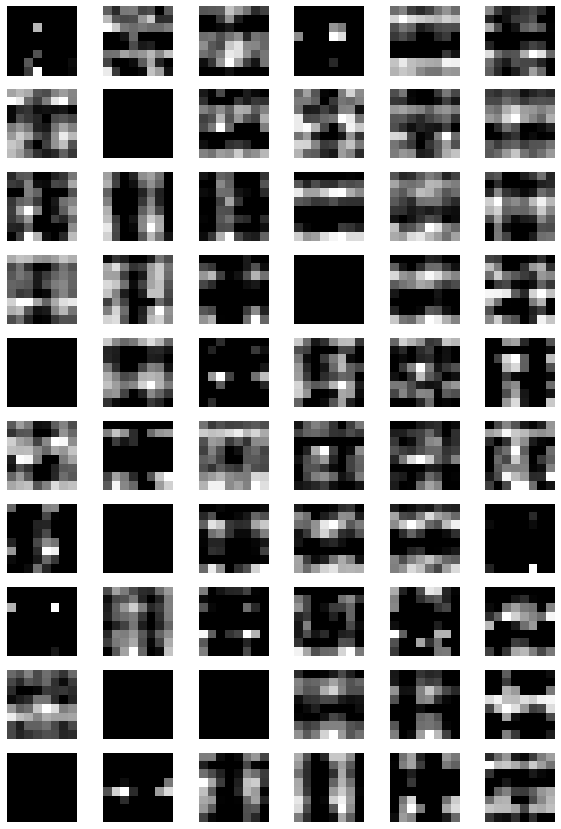

In [30]:
# Show feature map at conv layer 2
x = x_test[1,:].reshape(1,32,32,3)
conv1 = model.layers[1]
conv1 = conv1(x)
pool1 = model.layers[2]
pool1 = pool1(conv1)
conv2 = model.layers[3]
conv2 = conv2(pool1)

conv2 = np.array(conv2)
print(conv2.shape)
fig = plt.figure(figsize=(10, 15))
columns = 6
rows = 10
for i in range(columns*rows):
    img = conv2[0,:,:,i]
    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns, i+1) )
    plt.axis('off'),plt.imshow(img)
    
plt.gray()
plt.show()

(1, 4, 4, 60)


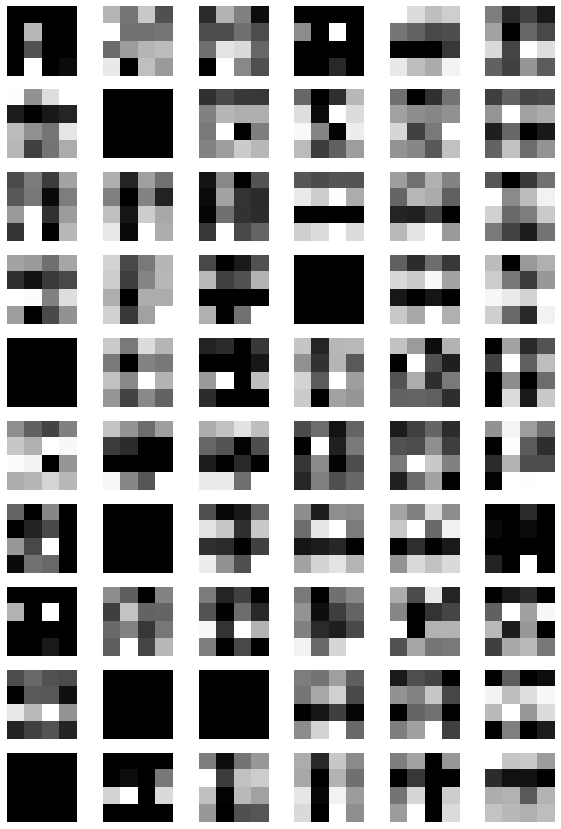

In [31]:
# Show feature map at pooling layer 2
x = x_test[1,:].reshape(1,32,32,3)
conv1 = model.layers[1]
conv1 = conv1(x)
pool1 = model.layers[2]
pool1 = pool1(conv1)
conv2 = model.layers[3]
conv2 = conv2(pool1)
pool2 = model.layers[4]
pool2 = pool2(conv2)

pool2 = np.array(pool2)
print(pool2.shape)
fig = plt.figure(figsize=(10, 15))
columns = 6
rows = 10
for i in range(columns*rows):
    img = pool2[0,:,:,i]
    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns, i+1) )
    plt.axis('off'),plt.imshow(img)
    
plt.gray()
plt.show()

## Part A: Object Recognition Question 2

In [44]:
X = np.append(x_train, x_test)
X  = np.array(X).reshape(-1, 32, 32, 3)
X.shape[1:]

(32, 32, 3)

In [45]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

epochs = 1000  # Fixed
batch_size = 128  # Fixed
learning_rate = 0.001

def create_model(c1 = 50, c2=60):
    # create model
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(c1, 9, activation='relu', input_shape=(32, 32, 3), padding="valid"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))
    model.add(layers.Conv2D(c2, 5, activation='relu', input_shape=(None, None, 3), padding="valid"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))
    model.add(layers.Flatten())
    model.add(layers.Dense(300, activation = None))
    model.add(layers.Dense(10, use_bias=True, input_shape=(300,)))
    # Compile model
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss=loss, metrics='accuracy')
    return model

model = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=batch_size, verbose=0)
# define the grid search parameters
c1 = [10, 30, 50, 70, 90]
c2 = [20, 40, 60, 80, 100]
param_grid = dict(c1=c1, c2=c2)

X = np.append(x_train, x_test)
X  = np.array(X).reshape(-1, 32, 32, 3)
Y = np.append(y_train, y_test)
# The indices which have the value -1 will be kept in train.
train_indices = np.full((10000,), -1, dtype=int)

# The indices which have zero or positive values, will be kept in test
test_indices = np.full((2000,), 0, dtype=int)
test_fold = np.append(train_indices, test_indices)

from sklearn.model_selection import PredefinedSplit
ps = PredefinedSplit(test_fold)

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=ps)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.524000 using {'c1': 30, 'c2': 100}
0.467500 (0.000000) with: {'c1': 10, 'c2': 20}
0.494000 (0.000000) with: {'c1': 10, 'c2': 40}
0.476000 (0.000000) with: {'c1': 10, 'c2': 60}
0.488500 (0.000000) with: {'c1': 10, 'c2': 80}
0.489000 (0.000000) with: {'c1': 10, 'c2': 100}
0.481500 (0.000000) with: {'c1': 30, 'c2': 20}
0.482500 (0.000000) with: {'c1': 30, 'c2': 40}
0.483500 (0.000000) with: {'c1': 30, 'c2': 60}
0.496500 (0.000000) with: {'c1': 30, 'c2': 80}
0.524000 (0.000000) with: {'c1': 30, 'c2': 100}
0.474500 (0.000000) with: {'c1': 50, 'c2': 20}
0.486000 (0.000000) with: {'c1': 50, 'c2': 40}
0.485500 (0.000000) with: {'c1': 50, 'c2': 60}
0.483500 (0.000000) with: {'c1': 50, 'c2': 80}
0.501500 (0.000000) with: {'c1': 50, 'c2': 100}
0.497500 (0.000000) with: {'c1': 70, 'c2': 20}
0.476000 (0.000000) with: {'c1': 70, 'c2': 40}
0.509000 (0.000000) with: {'c1': 70, 'c2': 60}
0.511500 (0.000000) with: {'c1': 70, 'c2': 80}
0.507000 (0.000000) with: {'c1': 70, 'c2': 100}
0.498000 (0.0

In [61]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)
epochs = 1000  # Fixed
batch_size = 128  # Fixed
learning_rate = 0.001

num_ch_c1 = 30  
num_ch_c2 = 100  

model = tf.keras.Sequential()
model.add(layers.Input(shape=(3072, )))
model.add(layers.Reshape(target_shape=(32, 32, 3), input_shape=(3072,)))
model.add(layers.Conv2D(num_ch_c1, 9, activation='relu', input_shape=(None, None, 3), padding="valid"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))
model.add(layers.Conv2D(num_ch_c2, 5, activation='relu', input_shape=(None, None, 3), padding="valid"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))
model.add(layers.Flatten())
model.add(layers.Dense(300, activation = None))
model.add(layers.Dense(10, use_bias=True, input_shape=(300,)))
          
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_12 (Reshape)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 24, 24, 30)        7320      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 8, 8, 100)         75100     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 4, 4, 100)         0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 300)             

In [62]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss=loss, metrics='accuracy')
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test))

Epoch 1/1000
79/79 [==============================] - 0s 6ms/step - loss: 2.3193 - accuracy: 0.0917 - val_loss: 2.2981 - val_accuracy: 0.1040
Epoch 2/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.2933 - accuracy: 0.1153 - val_loss: 2.2858 - val_accuracy: 0.1385
Epoch 3/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.2836 - accuracy: 0.1654 - val_loss: 2.2787 - val_accuracy: 0.1770
Epoch 4/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.2765 - accuracy: 0.1753 - val_loss: 2.2723 - val_accuracy: 0.1770
Epoch 5/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.2696 - accuracy: 0.1843 - val_loss: 2.2652 - val_accuracy: 0.2015
Epoch 6/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.2621 - accuracy: 0.1981 - val_loss: 2.2572 - val_accuracy: 0.2005
Epoch 7/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.2538 - accuracy: 0.2011 - val_loss: 2.2484 - val_accuracy: 0.2015
Epoch 

79/79 [==============================] - 0s 4ms/step - loss: 1.8600 - accuracy: 0.3427 - val_loss: 1.8722 - val_accuracy: 0.3235
Epoch 59/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.8550 - accuracy: 0.3426 - val_loss: 1.8831 - val_accuracy: 0.3205
Epoch 60/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.8529 - accuracy: 0.3411 - val_loss: 1.8558 - val_accuracy: 0.3320
Epoch 61/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.8484 - accuracy: 0.3466 - val_loss: 1.8599 - val_accuracy: 0.3425
Epoch 62/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.8459 - accuracy: 0.3499 - val_loss: 1.8641 - val_accuracy: 0.3215
Epoch 63/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.8429 - accuracy: 0.3510 - val_loss: 1.8746 - val_accuracy: 0.3155
Epoch 64/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.8412 - accuracy: 0.3503 - val_loss: 1.8794 - val_accuracy: 0.3175
Epoch 65/1000

Epoch 172/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5941 - accuracy: 0.4445 - val_loss: 1.6467 - val_accuracy: 0.4305
Epoch 173/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5934 - accuracy: 0.4417 - val_loss: 1.6945 - val_accuracy: 0.4030
Epoch 174/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5930 - accuracy: 0.4423 - val_loss: 1.6293 - val_accuracy: 0.4360
Epoch 175/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5921 - accuracy: 0.4469 - val_loss: 1.7210 - val_accuracy: 0.3905
Epoch 176/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5927 - accuracy: 0.4437 - val_loss: 1.6471 - val_accuracy: 0.4320
Epoch 177/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5869 - accuracy: 0.4390 - val_loss: 1.6585 - val_accuracy: 0.4035
Epoch 178/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5858 - accuracy: 0.4463 - val_loss: 1.6628 - val_accuracy:

Epoch 285/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4378 - accuracy: 0.5004 - val_loss: 1.6956 - val_accuracy: 0.4005
Epoch 286/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4365 - accuracy: 0.4994 - val_loss: 1.5295 - val_accuracy: 0.4695
Epoch 287/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4317 - accuracy: 0.4992 - val_loss: 1.6427 - val_accuracy: 0.4330
Epoch 288/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4359 - accuracy: 0.5044 - val_loss: 1.5375 - val_accuracy: 0.4595
Epoch 289/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4276 - accuracy: 0.5021 - val_loss: 1.5405 - val_accuracy: 0.4710
Epoch 290/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4293 - accuracy: 0.5060 - val_loss: 1.5322 - val_accuracy: 0.4910
Epoch 291/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4274 - accuracy: 0.5027 - val_loss: 1.6560 - val_accuracy:

Epoch 342/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3732 - accuracy: 0.5248 - val_loss: 1.6164 - val_accuracy: 0.4315
Epoch 343/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3698 - accuracy: 0.5264 - val_loss: 1.5218 - val_accuracy: 0.4805
Epoch 344/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3692 - accuracy: 0.5222 - val_loss: 1.8643 - val_accuracy: 0.3760
Epoch 345/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3774 - accuracy: 0.5218 - val_loss: 1.4858 - val_accuracy: 0.4905
Epoch 346/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3670 - accuracy: 0.5256 - val_loss: 1.5554 - val_accuracy: 0.4585
Epoch 347/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3642 - accuracy: 0.5269 - val_loss: 1.5256 - val_accuracy: 0.4740
Epoch 348/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3635 - accuracy: 0.5289 - val_loss: 1.6524 - val_accuracy:

Epoch 399/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3152 - accuracy: 0.5435 - val_loss: 1.6200 - val_accuracy: 0.4430
Epoch 400/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3129 - accuracy: 0.5458 - val_loss: 1.4862 - val_accuracy: 0.4905
Epoch 401/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3117 - accuracy: 0.5493 - val_loss: 1.8390 - val_accuracy: 0.3600
Epoch 402/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3091 - accuracy: 0.5466 - val_loss: 1.5611 - val_accuracy: 0.4570
Epoch 403/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3146 - accuracy: 0.5487 - val_loss: 1.5768 - val_accuracy: 0.4565
Epoch 404/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3138 - accuracy: 0.5468 - val_loss: 1.8190 - val_accuracy: 0.3925
Epoch 405/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3053 - accuracy: 0.5525 - val_loss: 1.4598 - val_accuracy:

Epoch 456/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2560 - accuracy: 0.5687 - val_loss: 1.7537 - val_accuracy: 0.3975
Epoch 457/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2580 - accuracy: 0.5656 - val_loss: 1.5340 - val_accuracy: 0.4685
Epoch 458/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2530 - accuracy: 0.5677 - val_loss: 1.5464 - val_accuracy: 0.4585
Epoch 459/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2486 - accuracy: 0.5709 - val_loss: 1.4561 - val_accuracy: 0.5000
Epoch 460/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2467 - accuracy: 0.5708 - val_loss: 1.6074 - val_accuracy: 0.4445
Epoch 461/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2557 - accuracy: 0.5673 - val_loss: 1.7253 - val_accuracy: 0.4160
Epoch 462/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2510 - accuracy: 0.5690 - val_loss: 1.5124 - val_accuracy:

Epoch 513/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2022 - accuracy: 0.5893 - val_loss: 1.4441 - val_accuracy: 0.5005
Epoch 514/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1973 - accuracy: 0.5886 - val_loss: 1.4355 - val_accuracy: 0.4960
Epoch 515/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1934 - accuracy: 0.5893 - val_loss: 1.5037 - val_accuracy: 0.4905
Epoch 516/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1947 - accuracy: 0.5885 - val_loss: 1.4548 - val_accuracy: 0.4975
Epoch 517/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1905 - accuracy: 0.5878 - val_loss: 1.7652 - val_accuracy: 0.4025
Epoch 518/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2005 - accuracy: 0.5855 - val_loss: 1.5031 - val_accuracy: 0.4675
Epoch 519/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1866 - accuracy: 0.5908 - val_loss: 1.4654 - val_accuracy:

Epoch 570/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1412 - accuracy: 0.6075 - val_loss: 1.4590 - val_accuracy: 0.5020
Epoch 571/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1411 - accuracy: 0.6061 - val_loss: 1.5112 - val_accuracy: 0.4710
Epoch 572/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1434 - accuracy: 0.6043 - val_loss: 1.5394 - val_accuracy: 0.4720
Epoch 573/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1426 - accuracy: 0.6059 - val_loss: 1.4236 - val_accuracy: 0.5180
Epoch 574/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1352 - accuracy: 0.6103 - val_loss: 1.5119 - val_accuracy: 0.4795
Epoch 575/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1410 - accuracy: 0.6070 - val_loss: 1.5087 - val_accuracy: 0.4800
Epoch 576/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1454 - accuracy: 0.6062 - val_loss: 1.6279 - val_accuracy:

Epoch 683/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0349 - accuracy: 0.6457 - val_loss: 1.7518 - val_accuracy: 0.4140
Epoch 684/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0362 - accuracy: 0.6476 - val_loss: 1.6441 - val_accuracy: 0.4425
Epoch 685/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0285 - accuracy: 0.6522 - val_loss: 1.8018 - val_accuracy: 0.4220
Epoch 686/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0348 - accuracy: 0.6458 - val_loss: 1.6324 - val_accuracy: 0.4430
Epoch 687/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0250 - accuracy: 0.6545 - val_loss: 1.4982 - val_accuracy: 0.4970
Epoch 688/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0292 - accuracy: 0.6517 - val_loss: 1.6878 - val_accuracy: 0.4345
Epoch 689/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0220 - accuracy: 0.6561 - val_loss: 1.7049 - val_accuracy:

Epoch 740/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9743 - accuracy: 0.6735 - val_loss: 1.5444 - val_accuracy: 0.4850
Epoch 741/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9766 - accuracy: 0.6684 - val_loss: 1.3958 - val_accuracy: 0.5235
Epoch 742/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9694 - accuracy: 0.6733 - val_loss: 1.4155 - val_accuracy: 0.5290
Epoch 743/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9693 - accuracy: 0.6723 - val_loss: 1.5684 - val_accuracy: 0.4875
Epoch 744/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9697 - accuracy: 0.6691 - val_loss: 1.5446 - val_accuracy: 0.4805
Epoch 745/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9617 - accuracy: 0.6765 - val_loss: 1.4614 - val_accuracy: 0.4970
Epoch 746/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9641 - accuracy: 0.6762 - val_loss: 1.4621 - val_accuracy:

Epoch 853/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8595 - accuracy: 0.7115 - val_loss: 1.4817 - val_accuracy: 0.5010
Epoch 854/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8471 - accuracy: 0.7203 - val_loss: 1.6748 - val_accuracy: 0.4495
Epoch 855/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8483 - accuracy: 0.7192 - val_loss: 1.6093 - val_accuracy: 0.4920
Epoch 856/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8494 - accuracy: 0.7177 - val_loss: 1.7298 - val_accuracy: 0.4435
Epoch 857/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8446 - accuracy: 0.7191 - val_loss: 1.5587 - val_accuracy: 0.4875
Epoch 858/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8442 - accuracy: 0.7207 - val_loss: 1.4218 - val_accuracy: 0.5225
Epoch 859/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8401 - accuracy: 0.7191 - val_loss: 1.5809 - val_accuracy:

Epoch 910/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.7946 - accuracy: 0.7412 - val_loss: 1.7150 - val_accuracy: 0.4495
Epoch 911/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.7971 - accuracy: 0.7388 - val_loss: 1.5623 - val_accuracy: 0.4815
Epoch 912/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.7867 - accuracy: 0.7368 - val_loss: 1.5232 - val_accuracy: 0.5030
Epoch 913/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.7870 - accuracy: 0.7405 - val_loss: 1.5684 - val_accuracy: 0.4960
Epoch 914/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.7869 - accuracy: 0.7410 - val_loss: 1.8478 - val_accuracy: 0.4415
Epoch 915/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.7845 - accuracy: 0.7444 - val_loss: 1.8611 - val_accuracy: 0.4620
Epoch 916/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.7881 - accuracy: 0.7392 - val_loss: 1.6525 - val_accuracy:

Epoch 967/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.7241 - accuracy: 0.7640 - val_loss: 1.6247 - val_accuracy: 0.4725
Epoch 968/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.7203 - accuracy: 0.7677 - val_loss: 1.7376 - val_accuracy: 0.4575
Epoch 969/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.7207 - accuracy: 0.7667 - val_loss: 1.7507 - val_accuracy: 0.4380
Epoch 970/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.7183 - accuracy: 0.7647 - val_loss: 1.5282 - val_accuracy: 0.5170
Epoch 971/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.7175 - accuracy: 0.7701 - val_loss: 1.6395 - val_accuracy: 0.4775
Epoch 972/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.7182 - accuracy: 0.7678 - val_loss: 1.7350 - val_accuracy: 0.4520
Epoch 973/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.7204 - accuracy: 0.7634 - val_loss: 1.6287 - val_accuracy:

In [63]:
mean_acc = np.mean(history.history['val_accuracy'][-10:])
print("mean accuracy for last 10 epochs: " + str(mean_acc*100) +"%")

mean accuracy for last 10 epochs: 48.564999997615814%


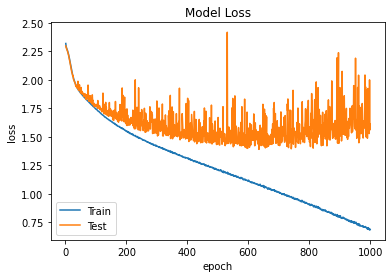

In [64]:
# Save the plot for losses
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Test')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

plt.savefig(
    f'./results/{num_ch_c1}_{num_ch_c2}_SGD_2_loss.pdf'
)

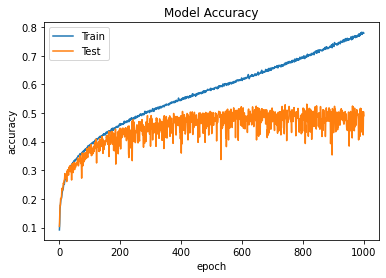

In [65]:
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Train')
plt.plot(range(1, len(test_acc) + 1), test_acc, label='Test')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

plt.savefig(
    f'./results/{num_ch_c1}_{num_ch_c2}_SGD_2_accuracy.pdf'
)

## Part A: Object Recognition Question 3a)

In [66]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)
epochs = 1000  # Fixed
batch_size = 128  # Fixed
learning_rate = 0.001

num_ch_c1 = 30  
num_ch_c2 = 100  

model = tf.keras.Sequential()
model.add(layers.Input(shape=(3072, )))
model.add(layers.Reshape(target_shape=(32, 32, 3), input_shape=(3072,)))
model.add(layers.Conv2D(num_ch_c1, 9, activation='relu', input_shape=(None, None, 3), padding="valid"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))
model.add(layers.Conv2D(num_ch_c2, 5, activation='relu', input_shape=(None, None, 3), padding="valid"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))
model.add(layers.Flatten())
model.add(layers.Dense(300, activation = None))
model.add(layers.Dense(10, use_bias=True, input_shape=(300,)))
          
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_13 (Reshape)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 24, 24, 30)        7320      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 8, 8, 100)         75100     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 4, 4, 100)         0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 300)             

In [67]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.1)
model.compile(optimizer=optimizer, loss=loss, metrics='accuracy')
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test))

model.save('models/qn_3a.h5')

Epoch 1/1000
79/79 [==============================] - 1s 7ms/step - loss: 2.3175 - accuracy: 0.0932 - val_loss: 2.2962 - val_accuracy: 0.1055
Epoch 2/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.2913 - accuracy: 0.1230 - val_loss: 2.2840 - val_accuracy: 0.1630
Epoch 3/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.2816 - accuracy: 0.1735 - val_loss: 2.2765 - val_accuracy: 0.1805
Epoch 4/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.2740 - accuracy: 0.1766 - val_loss: 2.2694 - val_accuracy: 0.1810
Epoch 5/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.2663 - accuracy: 0.1875 - val_loss: 2.2612 - val_accuracy: 0.2025
Epoch 6/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.2575 - accuracy: 0.2015 - val_loss: 2.2516 - val_accuracy: 0.2030
Epoch 7/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.2475 - accuracy: 0.2082 - val_loss: 2.2413 - val_accuracy: 0.2125
Epoch 

Epoch 115/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.6807 - accuracy: 0.4116 - val_loss: 1.7324 - val_accuracy: 0.3785
Epoch 116/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.6772 - accuracy: 0.4103 - val_loss: 1.7234 - val_accuracy: 0.3975
Epoch 117/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.6745 - accuracy: 0.4125 - val_loss: 1.7124 - val_accuracy: 0.4040
Epoch 118/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.6725 - accuracy: 0.4116 - val_loss: 1.7247 - val_accuracy: 0.3775
Epoch 119/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.6704 - accuracy: 0.4189 - val_loss: 1.6959 - val_accuracy: 0.4065
Epoch 120/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.6682 - accuracy: 0.4172 - val_loss: 1.7103 - val_accuracy: 0.3920
Epoch 121/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.6666 - accuracy: 0.4130 - val_loss: 1.7006 - val_accuracy:

Epoch 172/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5634 - accuracy: 0.4549 - val_loss: 1.6262 - val_accuracy: 0.4450
Epoch 173/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5624 - accuracy: 0.4538 - val_loss: 1.6654 - val_accuracy: 0.4205
Epoch 174/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5620 - accuracy: 0.4556 - val_loss: 1.6049 - val_accuracy: 0.4470
Epoch 175/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5612 - accuracy: 0.4562 - val_loss: 1.7013 - val_accuracy: 0.3990
Epoch 176/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5615 - accuracy: 0.4545 - val_loss: 1.6250 - val_accuracy: 0.4380
Epoch 177/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5559 - accuracy: 0.4539 - val_loss: 1.6445 - val_accuracy: 0.4075
Epoch 178/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5544 - accuracy: 0.4609 - val_loss: 1.6364 - val_accuracy:

Epoch 229/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4789 - accuracy: 0.4813 - val_loss: 1.9681 - val_accuracy: 0.3570
Epoch 230/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4765 - accuracy: 0.4842 - val_loss: 1.5528 - val_accuracy: 0.4640
Epoch 231/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4702 - accuracy: 0.4934 - val_loss: 1.6173 - val_accuracy: 0.4400
Epoch 232/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4696 - accuracy: 0.4850 - val_loss: 1.5882 - val_accuracy: 0.4330
Epoch 233/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4678 - accuracy: 0.4884 - val_loss: 1.7355 - val_accuracy: 0.3995
Epoch 234/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4692 - accuracy: 0.4912 - val_loss: 1.6712 - val_accuracy: 0.4335
Epoch 235/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4673 - accuracy: 0.4873 - val_loss: 1.7360 - val_accuracy:

Epoch 286/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4000 - accuracy: 0.5138 - val_loss: 1.5099 - val_accuracy: 0.4715
Epoch 287/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3968 - accuracy: 0.5132 - val_loss: 1.6330 - val_accuracy: 0.4365
Epoch 288/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4009 - accuracy: 0.5166 - val_loss: 1.5142 - val_accuracy: 0.4715
Epoch 289/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3917 - accuracy: 0.5167 - val_loss: 1.5220 - val_accuracy: 0.4785
Epoch 290/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3935 - accuracy: 0.5189 - val_loss: 1.5178 - val_accuracy: 0.4935
Epoch 291/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3920 - accuracy: 0.5155 - val_loss: 1.6402 - val_accuracy: 0.4415
Epoch 292/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3918 - accuracy: 0.5163 - val_loss: 1.5163 - val_accuracy:

Epoch 343/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3307 - accuracy: 0.5392 - val_loss: 1.5160 - val_accuracy: 0.4825
Epoch 344/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3298 - accuracy: 0.5361 - val_loss: 1.8947 - val_accuracy: 0.3755
Epoch 345/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3373 - accuracy: 0.5365 - val_loss: 1.4671 - val_accuracy: 0.4925
Epoch 346/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3266 - accuracy: 0.5414 - val_loss: 1.5300 - val_accuracy: 0.4605
Epoch 347/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3248 - accuracy: 0.5439 - val_loss: 1.5038 - val_accuracy: 0.4765
Epoch 348/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3234 - accuracy: 0.5418 - val_loss: 1.6295 - val_accuracy: 0.4280
Epoch 349/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3264 - accuracy: 0.5447 - val_loss: 1.6597 - val_accuracy:

Epoch 400/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2685 - accuracy: 0.5650 - val_loss: 1.4806 - val_accuracy: 0.4930
Epoch 401/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2672 - accuracy: 0.5646 - val_loss: 1.8408 - val_accuracy: 0.3655
Epoch 402/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2659 - accuracy: 0.5613 - val_loss: 1.5673 - val_accuracy: 0.4545
Epoch 403/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2706 - accuracy: 0.5650 - val_loss: 1.5694 - val_accuracy: 0.4615
Epoch 404/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2693 - accuracy: 0.5622 - val_loss: 1.8188 - val_accuracy: 0.3990
Epoch 405/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2607 - accuracy: 0.5701 - val_loss: 1.4411 - val_accuracy: 0.5100
Epoch 406/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2579 - accuracy: 0.5693 - val_loss: 1.5069 - val_accuracy:

Epoch 457/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2077 - accuracy: 0.5865 - val_loss: 1.5098 - val_accuracy: 0.4760
Epoch 458/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2029 - accuracy: 0.5834 - val_loss: 1.5303 - val_accuracy: 0.4700
Epoch 459/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2000 - accuracy: 0.5896 - val_loss: 1.4426 - val_accuracy: 0.5000
Epoch 460/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1971 - accuracy: 0.5897 - val_loss: 1.5873 - val_accuracy: 0.4480
Epoch 461/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2057 - accuracy: 0.5870 - val_loss: 1.7186 - val_accuracy: 0.4190
Epoch 462/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2012 - accuracy: 0.5856 - val_loss: 1.4944 - val_accuracy: 0.4915
Epoch 463/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1964 - accuracy: 0.5856 - val_loss: 1.4354 - val_accuracy:

Epoch 514/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1418 - accuracy: 0.6088 - val_loss: 1.4180 - val_accuracy: 0.5055
Epoch 515/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1379 - accuracy: 0.6071 - val_loss: 1.5038 - val_accuracy: 0.4945
Epoch 516/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1399 - accuracy: 0.6137 - val_loss: 1.4363 - val_accuracy: 0.4995
Epoch 517/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1345 - accuracy: 0.6135 - val_loss: 1.8051 - val_accuracy: 0.3975
Epoch 518/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1453 - accuracy: 0.6039 - val_loss: 1.4969 - val_accuracy: 0.4695
Epoch 519/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1312 - accuracy: 0.6100 - val_loss: 1.4685 - val_accuracy: 0.4960
Epoch 520/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1404 - accuracy: 0.6051 - val_loss: 1.5254 - val_accuracy:

Epoch 571/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0786 - accuracy: 0.6300 - val_loss: 1.5320 - val_accuracy: 0.4645
Epoch 572/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0812 - accuracy: 0.6274 - val_loss: 1.5154 - val_accuracy: 0.4795
Epoch 573/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0797 - accuracy: 0.6283 - val_loss: 1.4227 - val_accuracy: 0.5155
Epoch 574/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0736 - accuracy: 0.6349 - val_loss: 1.5135 - val_accuracy: 0.4860
Epoch 575/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0782 - accuracy: 0.6306 - val_loss: 1.5040 - val_accuracy: 0.4890
Epoch 576/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0797 - accuracy: 0.6292 - val_loss: 1.6458 - val_accuracy: 0.4730
Epoch 577/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0798 - accuracy: 0.6307 - val_loss: 1.4979 - val_accuracy:

Epoch 628/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0150 - accuracy: 0.6541 - val_loss: 1.4909 - val_accuracy: 0.4835
Epoch 629/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0189 - accuracy: 0.6546 - val_loss: 1.5070 - val_accuracy: 0.4750
Epoch 630/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0152 - accuracy: 0.6534 - val_loss: 1.5061 - val_accuracy: 0.4850
Epoch 631/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0169 - accuracy: 0.6525 - val_loss: 1.4478 - val_accuracy: 0.4985
Epoch 632/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0065 - accuracy: 0.6601 - val_loss: 1.5458 - val_accuracy: 0.4690
Epoch 633/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0085 - accuracy: 0.6581 - val_loss: 1.4963 - val_accuracy: 0.4850
Epoch 634/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0074 - accuracy: 0.6612 - val_loss: 1.5284 - val_accuracy:

Epoch 685/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9513 - accuracy: 0.6781 - val_loss: 1.8621 - val_accuracy: 0.4080
Epoch 686/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9571 - accuracy: 0.6774 - val_loss: 1.6558 - val_accuracy: 0.4475
Epoch 687/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9474 - accuracy: 0.6813 - val_loss: 1.5153 - val_accuracy: 0.5000
Epoch 688/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9505 - accuracy: 0.6820 - val_loss: 1.7381 - val_accuracy: 0.4315
Epoch 689/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9438 - accuracy: 0.6802 - val_loss: 1.7155 - val_accuracy: 0.4315
Epoch 690/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9469 - accuracy: 0.6776 - val_loss: 1.4544 - val_accuracy: 0.5040
Epoch 691/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9436 - accuracy: 0.6805 - val_loss: 1.5782 - val_accuracy:

Epoch 742/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8841 - accuracy: 0.7027 - val_loss: 1.4291 - val_accuracy: 0.5290
Epoch 743/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8818 - accuracy: 0.7069 - val_loss: 1.5998 - val_accuracy: 0.4835
Epoch 744/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8802 - accuracy: 0.7043 - val_loss: 1.5598 - val_accuracy: 0.4875
Epoch 745/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8752 - accuracy: 0.7061 - val_loss: 1.4839 - val_accuracy: 0.5030
Epoch 746/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8768 - accuracy: 0.7079 - val_loss: 1.4719 - val_accuracy: 0.5110
Epoch 747/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8816 - accuracy: 0.7019 - val_loss: 2.0540 - val_accuracy: 0.3950
Epoch 748/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8863 - accuracy: 0.7058 - val_loss: 1.4482 - val_accuracy:

Epoch 799/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8100 - accuracy: 0.7317 - val_loss: 1.5780 - val_accuracy: 0.4845
Epoch 800/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8117 - accuracy: 0.7330 - val_loss: 1.6318 - val_accuracy: 0.4750
Epoch 801/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8159 - accuracy: 0.7320 - val_loss: 1.4903 - val_accuracy: 0.5145
Epoch 802/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8079 - accuracy: 0.7335 - val_loss: 1.5269 - val_accuracy: 0.5055
Epoch 803/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8026 - accuracy: 0.7354 - val_loss: 1.5540 - val_accuracy: 0.4950
Epoch 804/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8030 - accuracy: 0.7346 - val_loss: 1.4378 - val_accuracy: 0.5200
Epoch 805/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8091 - accuracy: 0.7307 - val_loss: 1.7873 - val_accuracy:

Epoch 856/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.7453 - accuracy: 0.7583 - val_loss: 1.8352 - val_accuracy: 0.4370
Epoch 857/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.7404 - accuracy: 0.7603 - val_loss: 1.6044 - val_accuracy: 0.4880
Epoch 858/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.7380 - accuracy: 0.7634 - val_loss: 1.4571 - val_accuracy: 0.5290
Epoch 859/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.7354 - accuracy: 0.7603 - val_loss: 1.6228 - val_accuracy: 0.4870
Epoch 860/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.7385 - accuracy: 0.7602 - val_loss: 1.6829 - val_accuracy: 0.4805
Epoch 861/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.7364 - accuracy: 0.7584 - val_loss: 1.7012 - val_accuracy: 0.4635
Epoch 862/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.7387 - accuracy: 0.7579 - val_loss: 1.8373 - val_accuracy:

Epoch 913/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.6756 - accuracy: 0.7843 - val_loss: 1.6910 - val_accuracy: 0.4810
Epoch 914/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.6740 - accuracy: 0.7839 - val_loss: 1.7797 - val_accuracy: 0.4640
Epoch 915/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.6688 - accuracy: 0.7890 - val_loss: 1.9432 - val_accuracy: 0.4620
Epoch 916/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.6742 - accuracy: 0.7850 - val_loss: 1.6916 - val_accuracy: 0.4590
Epoch 917/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.6676 - accuracy: 0.7889 - val_loss: 1.6564 - val_accuracy: 0.4965
Epoch 918/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.6648 - accuracy: 0.7892 - val_loss: 1.5625 - val_accuracy: 0.4970
Epoch 919/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.6614 - accuracy: 0.7906 - val_loss: 1.5935 - val_accuracy:

Epoch 970/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.5974 - accuracy: 0.8133 - val_loss: 1.5941 - val_accuracy: 0.5175
Epoch 971/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.5965 - accuracy: 0.8201 - val_loss: 1.7274 - val_accuracy: 0.4810
Epoch 972/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.5980 - accuracy: 0.8160 - val_loss: 1.9088 - val_accuracy: 0.4370
Epoch 973/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.6014 - accuracy: 0.8117 - val_loss: 1.7449 - val_accuracy: 0.4880
Epoch 974/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.5988 - accuracy: 0.8147 - val_loss: 1.9439 - val_accuracy: 0.4505
Epoch 975/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.5959 - accuracy: 0.8135 - val_loss: 1.7894 - val_accuracy: 0.4675
Epoch 976/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.5906 - accuracy: 0.8173 - val_loss: 1.6452 - val_accuracy:

In [68]:
mean_acc = np.mean(history.history['val_accuracy'][-10:])
print("mean accuracy for last 10 epochs: " + str(mean_acc*100) +"%")

mean accuracy for last 10 epochs: 48.910000920295715%


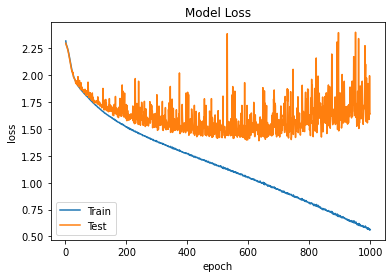

In [69]:
# Save the plot for losses
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Test')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

plt.savefig(
    f'./results/{num_ch_c1}_{num_ch_c2}_SGD_3a_loss.pdf'
)

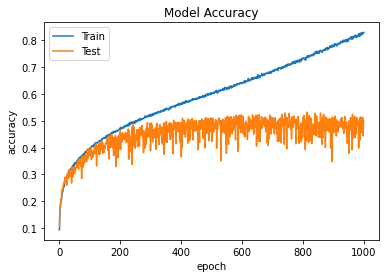

In [70]:
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Train')
plt.plot(range(1, len(test_acc) + 1), test_acc, label='Test')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

plt.savefig(
    f'./results/{num_ch_c1}_{num_ch_c2}_SGD_3a_accuracy.pdf'
)

## Part A: Object Recognition Question 3b)

In [71]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)
epochs = 1000  # Fixed
batch_size = 128  # Fixed
learning_rate = 0.001

num_ch_c1 = 30  
num_ch_c2 = 100  

model = tf.keras.Sequential()
model.add(layers.Input(shape=(3072, )))
model.add(layers.Reshape(target_shape=(32, 32, 3), input_shape=(3072,)))
model.add(layers.Conv2D(num_ch_c1, 9, activation='relu', input_shape=(None, None, 3), padding="valid"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))
model.add(layers.Conv2D(num_ch_c2, 5, activation='relu', input_shape=(None, None, 3), padding="valid"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))
model.add(layers.Flatten())
model.add(layers.Dense(300, activation = None))
model.add(layers.Dense(10, use_bias=True, input_shape=(300,)))
          
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_14 (Reshape)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 24, 24, 30)        7320      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 8, 8, 100)         75100     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 4, 4, 100)         0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 300)             

In [72]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = keras.optimizers.RMSprop(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss=loss, metrics='accuracy')
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test))

model.save('models/qn_3b.h5')

Epoch 1/1000
79/79 [==============================] - 0s 6ms/step - loss: 2.1590 - accuracy: 0.2092 - val_loss: 2.3161 - val_accuracy: 0.1625
Epoch 2/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.9653 - accuracy: 0.2880 - val_loss: 1.9869 - val_accuracy: 0.2655
Epoch 3/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.8191 - accuracy: 0.3497 - val_loss: 1.9542 - val_accuracy: 0.3170
Epoch 4/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.7322 - accuracy: 0.3790 - val_loss: 1.7843 - val_accuracy: 0.3670
Epoch 5/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.6617 - accuracy: 0.4115 - val_loss: 1.7107 - val_accuracy: 0.4040
Epoch 6/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5820 - accuracy: 0.4459 - val_loss: 1.7866 - val_accuracy: 0.3825
Epoch 7/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5089 - accuracy: 0.4704 - val_loss: 1.8891 - val_accuracy: 0.3210
Epoch 

79/79 [==============================] - 0s 5ms/step - loss: 0.0730 - accuracy: 0.9804 - val_loss: 7.7939 - val_accuracy: 0.4530
Epoch 116/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.0659 - accuracy: 0.9813 - val_loss: 7.6088 - val_accuracy: 0.4580
Epoch 117/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.0601 - accuracy: 0.9833 - val_loss: 7.7397 - val_accuracy: 0.4620
Epoch 118/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.0516 - accuracy: 0.9846 - val_loss: 7.8863 - val_accuracy: 0.4610
Epoch 119/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.0651 - accuracy: 0.9816 - val_loss: 7.8168 - val_accuracy: 0.4480
Epoch 120/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.0639 - accuracy: 0.9814 - val_loss: 7.6893 - val_accuracy: 0.4500
Epoch 121/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.0697 - accuracy: 0.9811 - val_loss: 7.5203 - val_accuracy: 0.4575
Epoch 1

Epoch 172/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.0536 - accuracy: 0.9864 - val_loss: 9.3467 - val_accuracy: 0.4620
Epoch 173/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.0386 - accuracy: 0.9888 - val_loss: 10.3809 - val_accuracy: 0.4385
Epoch 174/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.0477 - accuracy: 0.9873 - val_loss: 9.2800 - val_accuracy: 0.4685
Epoch 175/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.0473 - accuracy: 0.9882 - val_loss: 9.3781 - val_accuracy: 0.4670
Epoch 176/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.0580 - accuracy: 0.9863 - val_loss: 9.3414 - val_accuracy: 0.4450
Epoch 177/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.0364 - accuracy: 0.9910 - val_loss: 9.8694 - val_accuracy: 0.4335
Epoch 178/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.0600 - accuracy: 0.9853 - val_loss: 9.5286 - val_accuracy

Epoch 229/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.0409 - accuracy: 0.9904 - val_loss: 10.3074 - val_accuracy: 0.4405
Epoch 230/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.0351 - accuracy: 0.9915 - val_loss: 10.4243 - val_accuracy: 0.4655
Epoch 231/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.0508 - accuracy: 0.9882 - val_loss: 9.7481 - val_accuracy: 0.4615
Epoch 232/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.0371 - accuracy: 0.9906 - val_loss: 10.1794 - val_accuracy: 0.4540
Epoch 233/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.0351 - accuracy: 0.9908 - val_loss: 10.3438 - val_accuracy: 0.4510
Epoch 234/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.0422 - accuracy: 0.9895 - val_loss: 10.4968 - val_accuracy: 0.4695
Epoch 235/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.0418 - accuracy: 0.9897 - val_loss: 10.1276 - val_acc

79/79 [==============================] - 0s 5ms/step - loss: 0.0315 - accuracy: 0.9920 - val_loss: 11.9025 - val_accuracy: 0.4420
Epoch 342/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.0331 - accuracy: 0.9922 - val_loss: 11.3335 - val_accuracy: 0.4690
Epoch 343/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.0202 - accuracy: 0.9942 - val_loss: 11.1224 - val_accuracy: 0.4445
Epoch 344/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.0337 - accuracy: 0.9923 - val_loss: 11.4121 - val_accuracy: 0.4495
Epoch 345/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.0332 - accuracy: 0.9922 - val_loss: 11.8471 - val_accuracy: 0.4525
Epoch 346/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.0250 - accuracy: 0.9935 - val_loss: 12.2923 - val_accuracy: 0.4530
Epoch 347/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.0345 - accuracy: 0.9930 - val_loss: 11.6246 - val_accuracy: 0.4630


79/79 [==============================] - 0s 5ms/step - loss: 0.0258 - accuracy: 0.9947 - val_loss: 14.6342 - val_accuracy: 0.4550
Epoch 454/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.0342 - accuracy: 0.9931 - val_loss: 13.5246 - val_accuracy: 0.4520
Epoch 455/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.0203 - accuracy: 0.9957 - val_loss: 13.8221 - val_accuracy: 0.4600
Epoch 456/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.0341 - accuracy: 0.9929 - val_loss: 14.7079 - val_accuracy: 0.4715
Epoch 457/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.0230 - accuracy: 0.9950 - val_loss: 14.8821 - val_accuracy: 0.4410
Epoch 458/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.0259 - accuracy: 0.9945 - val_loss: 14.7293 - val_accuracy: 0.4530
Epoch 459/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.0277 - accuracy: 0.9936 - val_loss: 14.9828 - val_accuracy: 0.4620


79/79 [==============================] - 0s 5ms/step - loss: 0.0267 - accuracy: 0.9956 - val_loss: 15.9307 - val_accuracy: 0.4430
Epoch 566/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.0287 - accuracy: 0.9939 - val_loss: 17.5102 - val_accuracy: 0.4560
Epoch 567/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.0286 - accuracy: 0.9948 - val_loss: 16.7979 - val_accuracy: 0.4505
Epoch 568/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.0195 - accuracy: 0.9948 - val_loss: 17.2802 - val_accuracy: 0.4485
Epoch 569/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.0257 - accuracy: 0.9957 - val_loss: 17.3083 - val_accuracy: 0.4605
Epoch 570/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.0278 - accuracy: 0.9953 - val_loss: 17.6249 - val_accuracy: 0.4625
Epoch 571/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.0188 - accuracy: 0.9962 - val_loss: 17.1892 - val_accuracy: 0.4580


79/79 [==============================] - 0s 5ms/step - loss: 0.0192 - accuracy: 0.9958 - val_loss: 19.6286 - val_accuracy: 0.4340
Epoch 678/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.0276 - accuracy: 0.9958 - val_loss: 20.0569 - val_accuracy: 0.4645
Epoch 679/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.0266 - accuracy: 0.9954 - val_loss: 20.5962 - val_accuracy: 0.4500
Epoch 680/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.0294 - accuracy: 0.9954 - val_loss: 19.8935 - val_accuracy: 0.4510
Epoch 681/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.0146 - accuracy: 0.9981 - val_loss: 19.5755 - val_accuracy: 0.4480
Epoch 682/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.0241 - accuracy: 0.9960 - val_loss: 22.2983 - val_accuracy: 0.4545
Epoch 683/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.0348 - accuracy: 0.9939 - val_loss: 21.7263 - val_accuracy: 0.4515


79/79 [==============================] - 0s 5ms/step - loss: 0.0323 - accuracy: 0.9963 - val_loss: 22.8036 - val_accuracy: 0.4580
Epoch 790/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.0400 - accuracy: 0.9945 - val_loss: 22.5886 - val_accuracy: 0.4550
Epoch 791/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.0279 - accuracy: 0.9958 - val_loss: 22.5151 - val_accuracy: 0.4540
Epoch 792/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.0235 - accuracy: 0.9964 - val_loss: 21.6150 - val_accuracy: 0.4605
Epoch 793/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.0271 - accuracy: 0.9953 - val_loss: 22.7612 - val_accuracy: 0.4595
Epoch 794/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.0251 - accuracy: 0.9966 - val_loss: 23.0560 - val_accuracy: 0.4560
Epoch 795/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.0230 - accuracy: 0.9961 - val_loss: 22.9716 - val_accuracy: 0.4395


79/79 [==============================] - 0s 5ms/step - loss: 0.0302 - accuracy: 0.9968 - val_loss: 26.0196 - val_accuracy: 0.4665
Epoch 902/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.0264 - accuracy: 0.9960 - val_loss: 26.0681 - val_accuracy: 0.4630
Epoch 903/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.0329 - accuracy: 0.9955 - val_loss: 26.0627 - val_accuracy: 0.4620
Epoch 904/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.0340 - accuracy: 0.9954 - val_loss: 25.3182 - val_accuracy: 0.4575
Epoch 905/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.0214 - accuracy: 0.9970 - val_loss: 26.9048 - val_accuracy: 0.4490
Epoch 906/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.0234 - accuracy: 0.9962 - val_loss: 26.6907 - val_accuracy: 0.4390
Epoch 907/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.0278 - accuracy: 0.9965 - val_loss: 27.0747 - val_accuracy: 0.4645


In [73]:
mean_acc = np.mean(history.history['val_accuracy'][-10:])
print("mean accuracy for last 10 epochs: " + str(mean_acc*100) +"%")

mean accuracy for last 10 epochs: 45.259999334812164%


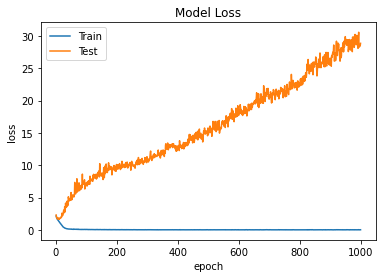

In [74]:
# Save the plot for losses
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Test')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

plt.savefig(
    f'./results/{num_ch_c1}_{num_ch_c2}_SGD_3b_loss.pdf'
)

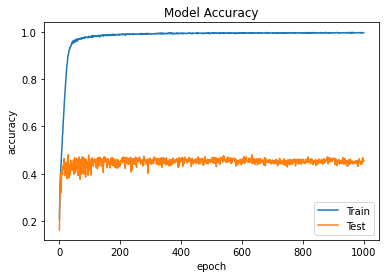

In [75]:
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Train')
plt.plot(range(1, len(test_acc) + 1), test_acc, label='Test')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

plt.savefig(
    f'./results/{num_ch_c1}_{num_ch_c2}_SGD_3b_accuracy.pdf'
)

In [133]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)
epochs = 1000  # Fixed
batch_size = 128  # Fixed
learning_rate = 1e-5

num_ch_c1 = 30  
num_ch_c2 = 100  

model = tf.keras.Sequential()
model.add(layers.Input(shape=(3072, )))
model.add(layers.Reshape(target_shape=(32, 32, 3), input_shape=(3072,)))
model.add(layers.Conv2D(num_ch_c1, 9, activation='relu', input_shape=(None, None, 3), padding="valid"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))
model.add(layers.Conv2D(num_ch_c2, 5, activation='relu', input_shape=(None, None, 3), padding="valid"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))
model.add(layers.Flatten())
model.add(layers.Dense(300, activation = None))
model.add(layers.Dense(10, use_bias=True, input_shape=(300,)))
          
model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_26 (Reshape)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 24, 24, 30)        7320      
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 8, 8, 100)         75100     
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 4, 4, 100)         0         
_________________________________________________________________
flatten_26 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_52 (Dense)             (None, 300)             

In [134]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = keras.optimizers.RMSprop(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss=loss, metrics='accuracy')
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test))

model.save('models/qn_3b.h5')

Epoch 1/1000
79/79 [==============================] - 1s 8ms/step - loss: 2.2975 - accuracy: 0.1232 - val_loss: 2.2721 - val_accuracy: 0.1750
Epoch 2/1000
79/79 [==============================] - 0s 6ms/step - loss: 2.2563 - accuracy: 0.1976 - val_loss: 2.2346 - val_accuracy: 0.2180
Epoch 3/1000
79/79 [==============================] - 0s 6ms/step - loss: 2.2164 - accuracy: 0.2190 - val_loss: 2.1931 - val_accuracy: 0.2325
Epoch 4/1000
79/79 [==============================] - 0s 6ms/step - loss: 2.1717 - accuracy: 0.2363 - val_loss: 2.1485 - val_accuracy: 0.2560
Epoch 5/1000
79/79 [==============================] - 0s 6ms/step - loss: 2.1288 - accuracy: 0.2595 - val_loss: 2.1057 - val_accuracy: 0.2705
Epoch 6/1000
79/79 [==============================] - 0s 6ms/step - loss: 2.0913 - accuracy: 0.2656 - val_loss: 2.0717 - val_accuracy: 0.2880
Epoch 7/1000
79/79 [==============================] - 0s 6ms/step - loss: 2.0604 - accuracy: 0.2778 - val_loss: 2.0425 - val_accuracy: 0.2885
Epoch 

79/79 [==============================] - 1s 7ms/step - loss: 1.5616 - accuracy: 0.4584 - val_loss: 1.6140 - val_accuracy: 0.4375
Epoch 116/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.5589 - accuracy: 0.4620 - val_loss: 1.6175 - val_accuracy: 0.4435
Epoch 117/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.5574 - accuracy: 0.4591 - val_loss: 1.6062 - val_accuracy: 0.4440
Epoch 118/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.5555 - accuracy: 0.4578 - val_loss: 1.6188 - val_accuracy: 0.4340
Epoch 119/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.5535 - accuracy: 0.4618 - val_loss: 1.6023 - val_accuracy: 0.4580
Epoch 120/1000
79/79 [==============================] - 1s 6ms/step - loss: 1.5520 - accuracy: 0.4638 - val_loss: 1.6060 - val_accuracy: 0.4435
Epoch 121/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5504 - accuracy: 0.4660 - val_loss: 1.5946 - val_accuracy: 0.4530
Epoch 1

Epoch 172/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4671 - accuracy: 0.4925 - val_loss: 1.5421 - val_accuracy: 0.4750
Epoch 173/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4658 - accuracy: 0.4923 - val_loss: 1.5468 - val_accuracy: 0.4735
Epoch 174/1000
79/79 [==============================] - 1s 6ms/step - loss: 1.4652 - accuracy: 0.4929 - val_loss: 1.5355 - val_accuracy: 0.4775
Epoch 175/1000
79/79 [==============================] - 1s 6ms/step - loss: 1.4642 - accuracy: 0.4927 - val_loss: 1.5443 - val_accuracy: 0.4600
Epoch 176/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4627 - accuracy: 0.4955 - val_loss: 1.5412 - val_accuracy: 0.4730
Epoch 177/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4608 - accuracy: 0.4938 - val_loss: 1.5577 - val_accuracy: 0.4530
Epoch 178/1000
79/79 [==============================] - 1s 6ms/step - loss: 1.4589 - accuracy: 0.4951 - val_loss: 1.5480 - val_accuracy:

Epoch 229/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3971 - accuracy: 0.5136 - val_loss: 1.5103 - val_accuracy: 0.4855
Epoch 230/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3945 - accuracy: 0.5160 - val_loss: 1.4933 - val_accuracy: 0.4895
Epoch 231/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3929 - accuracy: 0.5215 - val_loss: 1.5061 - val_accuracy: 0.4860
Epoch 232/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3927 - accuracy: 0.5196 - val_loss: 1.5245 - val_accuracy: 0.4615
Epoch 233/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3915 - accuracy: 0.5168 - val_loss: 1.5163 - val_accuracy: 0.4860
Epoch 234/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3907 - accuracy: 0.5215 - val_loss: 1.5087 - val_accuracy: 0.4980
Epoch 235/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3889 - accuracy: 0.5194 - val_loss: 1.5174 - val_accuracy:

Epoch 286/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3363 - accuracy: 0.5401 - val_loss: 1.4637 - val_accuracy: 0.4955
Epoch 287/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3350 - accuracy: 0.5372 - val_loss: 1.4994 - val_accuracy: 0.4785
Epoch 288/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3360 - accuracy: 0.5420 - val_loss: 1.4650 - val_accuracy: 0.4910
Epoch 289/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3332 - accuracy: 0.5405 - val_loss: 1.4728 - val_accuracy: 0.4920
Epoch 290/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3329 - accuracy: 0.5403 - val_loss: 1.4721 - val_accuracy: 0.4995
Epoch 291/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3305 - accuracy: 0.5407 - val_loss: 1.5262 - val_accuracy: 0.4750
Epoch 292/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3310 - accuracy: 0.5394 - val_loss: 1.4641 - val_accuracy:

Epoch 343/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2837 - accuracy: 0.5579 - val_loss: 1.4832 - val_accuracy: 0.4900
Epoch 344/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2835 - accuracy: 0.5535 - val_loss: 1.4884 - val_accuracy: 0.4920
Epoch 345/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2848 - accuracy: 0.5577 - val_loss: 1.4362 - val_accuracy: 0.5105
Epoch 346/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2827 - accuracy: 0.5577 - val_loss: 1.4534 - val_accuracy: 0.4980
Epoch 347/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2812 - accuracy: 0.5634 - val_loss: 1.4409 - val_accuracy: 0.5020
Epoch 348/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2792 - accuracy: 0.5616 - val_loss: 1.4549 - val_accuracy: 0.4970
Epoch 349/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2804 - accuracy: 0.5595 - val_loss: 1.5068 - val_accuracy:

Epoch 400/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2398 - accuracy: 0.5757 - val_loss: 1.4278 - val_accuracy: 0.5050
Epoch 401/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2394 - accuracy: 0.5801 - val_loss: 1.4689 - val_accuracy: 0.4830
Epoch 402/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2365 - accuracy: 0.5770 - val_loss: 1.4426 - val_accuracy: 0.4935
Epoch 403/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2387 - accuracy: 0.5784 - val_loss: 1.4506 - val_accuracy: 0.4955
Epoch 404/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2367 - accuracy: 0.5757 - val_loss: 1.4495 - val_accuracy: 0.4925
Epoch 405/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2330 - accuracy: 0.5804 - val_loss: 1.4286 - val_accuracy: 0.5075
Epoch 406/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2341 - accuracy: 0.5764 - val_loss: 1.4225 - val_accuracy:

Epoch 457/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1955 - accuracy: 0.5916 - val_loss: 1.4249 - val_accuracy: 0.5005
Epoch 458/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1967 - accuracy: 0.5852 - val_loss: 1.4201 - val_accuracy: 0.5060
Epoch 459/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1943 - accuracy: 0.5911 - val_loss: 1.4184 - val_accuracy: 0.5050
Epoch 460/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1949 - accuracy: 0.5894 - val_loss: 1.4347 - val_accuracy: 0.4935
Epoch 461/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1957 - accuracy: 0.5915 - val_loss: 1.4273 - val_accuracy: 0.5065
Epoch 462/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1931 - accuracy: 0.5935 - val_loss: 1.4491 - val_accuracy: 0.4990
Epoch 463/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1919 - accuracy: 0.5901 - val_loss: 1.4307 - val_accuracy:

Epoch 514/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1582 - accuracy: 0.6011 - val_loss: 1.3957 - val_accuracy: 0.5100
Epoch 515/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1571 - accuracy: 0.6051 - val_loss: 1.4166 - val_accuracy: 0.5055
Epoch 516/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1558 - accuracy: 0.6022 - val_loss: 1.4059 - val_accuracy: 0.5040
Epoch 517/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1542 - accuracy: 0.6039 - val_loss: 1.4709 - val_accuracy: 0.4880
Epoch 518/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1560 - accuracy: 0.6023 - val_loss: 1.4081 - val_accuracy: 0.4990
Epoch 519/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1525 - accuracy: 0.6056 - val_loss: 1.4250 - val_accuracy: 0.5015
Epoch 520/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1542 - accuracy: 0.6055 - val_loss: 1.4348 - val_accuracy:

Epoch 571/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1194 - accuracy: 0.6127 - val_loss: 1.4189 - val_accuracy: 0.4990
Epoch 572/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1191 - accuracy: 0.6191 - val_loss: 1.4341 - val_accuracy: 0.4970
Epoch 573/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1194 - accuracy: 0.6133 - val_loss: 1.4005 - val_accuracy: 0.5115
Epoch 574/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1176 - accuracy: 0.6192 - val_loss: 1.4144 - val_accuracy: 0.5015
Epoch 575/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1180 - accuracy: 0.6188 - val_loss: 1.4294 - val_accuracy: 0.5015
Epoch 576/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1180 - accuracy: 0.6176 - val_loss: 1.4079 - val_accuracy: 0.5110
Epoch 577/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1171 - accuracy: 0.6163 - val_loss: 1.3970 - val_accuracy:

Epoch 628/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0831 - accuracy: 0.6310 - val_loss: 1.4161 - val_accuracy: 0.5040
Epoch 629/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0836 - accuracy: 0.6312 - val_loss: 1.4346 - val_accuracy: 0.4975
Epoch 630/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0820 - accuracy: 0.6297 - val_loss: 1.3939 - val_accuracy: 0.5150
Epoch 631/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0827 - accuracy: 0.6288 - val_loss: 1.3833 - val_accuracy: 0.5070
Epoch 632/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0794 - accuracy: 0.6313 - val_loss: 1.4167 - val_accuracy: 0.4950
Epoch 633/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0795 - accuracy: 0.6302 - val_loss: 1.4068 - val_accuracy: 0.5200
Epoch 634/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0808 - accuracy: 0.6278 - val_loss: 1.3999 - val_accuracy:

Epoch 685/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0483 - accuracy: 0.6402 - val_loss: 1.4126 - val_accuracy: 0.5025
Epoch 686/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0484 - accuracy: 0.6391 - val_loss: 1.3997 - val_accuracy: 0.5105
Epoch 687/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0466 - accuracy: 0.6410 - val_loss: 1.3811 - val_accuracy: 0.5110
Epoch 688/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0467 - accuracy: 0.6447 - val_loss: 1.4501 - val_accuracy: 0.5010
Epoch 689/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0452 - accuracy: 0.6404 - val_loss: 1.4743 - val_accuracy: 0.4850
Epoch 690/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0454 - accuracy: 0.6388 - val_loss: 1.3830 - val_accuracy: 0.5170
Epoch 691/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0449 - accuracy: 0.6429 - val_loss: 1.4138 - val_accuracy:

Epoch 742/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0138 - accuracy: 0.6565 - val_loss: 1.3700 - val_accuracy: 0.5275
Epoch 743/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0125 - accuracy: 0.6541 - val_loss: 1.3905 - val_accuracy: 0.5160
Epoch 744/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0128 - accuracy: 0.6559 - val_loss: 1.4133 - val_accuracy: 0.5040
Epoch 745/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0110 - accuracy: 0.6567 - val_loss: 1.4023 - val_accuracy: 0.5020
Epoch 746/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0113 - accuracy: 0.6542 - val_loss: 1.3782 - val_accuracy: 0.5190
Epoch 747/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0112 - accuracy: 0.6570 - val_loss: 1.4147 - val_accuracy: 0.5100
Epoch 748/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0108 - accuracy: 0.6584 - val_loss: 1.3839 - val_accuracy:

Epoch 799/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9789 - accuracy: 0.6664 - val_loss: 1.4029 - val_accuracy: 0.5070
Epoch 800/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9784 - accuracy: 0.6679 - val_loss: 1.4021 - val_accuracy: 0.5140
Epoch 801/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9784 - accuracy: 0.6714 - val_loss: 1.3648 - val_accuracy: 0.5235
Epoch 802/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9764 - accuracy: 0.6696 - val_loss: 1.4136 - val_accuracy: 0.5190
Epoch 803/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9756 - accuracy: 0.6711 - val_loss: 1.3960 - val_accuracy: 0.5155
Epoch 804/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9745 - accuracy: 0.6708 - val_loss: 1.3674 - val_accuracy: 0.5225
Epoch 805/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9763 - accuracy: 0.6694 - val_loss: 1.4202 - val_accuracy:

Epoch 856/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9436 - accuracy: 0.6821 - val_loss: 1.4499 - val_accuracy: 0.4945
Epoch 857/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9427 - accuracy: 0.6799 - val_loss: 1.3993 - val_accuracy: 0.5095
Epoch 858/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9434 - accuracy: 0.6801 - val_loss: 1.3721 - val_accuracy: 0.5195
Epoch 859/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9420 - accuracy: 0.6763 - val_loss: 1.4041 - val_accuracy: 0.5030
Epoch 860/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9421 - accuracy: 0.6849 - val_loss: 1.4563 - val_accuracy: 0.5060
Epoch 861/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9429 - accuracy: 0.6843 - val_loss: 1.3892 - val_accuracy: 0.5130
Epoch 862/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9424 - accuracy: 0.6809 - val_loss: 1.4384 - val_accuracy:

Epoch 913/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9119 - accuracy: 0.6929 - val_loss: 1.3850 - val_accuracy: 0.5190
Epoch 914/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9100 - accuracy: 0.6943 - val_loss: 1.4087 - val_accuracy: 0.5245
Epoch 915/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9108 - accuracy: 0.6932 - val_loss: 1.4315 - val_accuracy: 0.5100
Epoch 916/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9107 - accuracy: 0.6949 - val_loss: 1.4091 - val_accuracy: 0.5120
Epoch 917/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9088 - accuracy: 0.6943 - val_loss: 1.4323 - val_accuracy: 0.5125
Epoch 918/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9085 - accuracy: 0.6961 - val_loss: 1.4150 - val_accuracy: 0.5125
Epoch 919/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9079 - accuracy: 0.6978 - val_loss: 1.3814 - val_accuracy:

Epoch 970/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8758 - accuracy: 0.7110 - val_loss: 1.3936 - val_accuracy: 0.5165
Epoch 971/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8756 - accuracy: 0.7088 - val_loss: 1.4057 - val_accuracy: 0.5225
Epoch 972/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8757 - accuracy: 0.7107 - val_loss: 1.4080 - val_accuracy: 0.5140
Epoch 973/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8759 - accuracy: 0.7069 - val_loss: 1.4094 - val_accuracy: 0.5135
Epoch 974/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8759 - accuracy: 0.7071 - val_loss: 1.4140 - val_accuracy: 0.5145
Epoch 975/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8735 - accuracy: 0.7100 - val_loss: 1.4696 - val_accuracy: 0.4950
Epoch 976/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8734 - accuracy: 0.7106 - val_loss: 1.3894 - val_accuracy:

In [137]:
mean_acc = np.mean(history.history['val_accuracy'][-10:])
print("mean accuracy for last 10 epochs: " + str(mean_acc*100) +"%")

mean accuracy for last 10 epochs: 51.04499965906143%


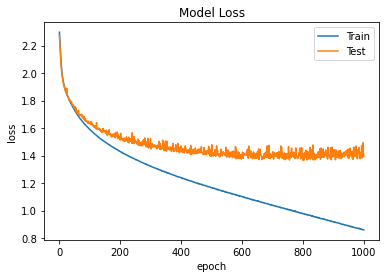

In [135]:
# Save the plot for losses
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Test')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

plt.savefig(
    f'./results/{num_ch_c1}_{num_ch_c2}_SGD_3b_1e-5_loss.pdf'
)

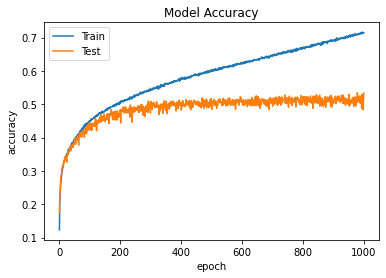

In [136]:
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Train')
plt.plot(range(1, len(test_acc) + 1), test_acc, label='Test')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

plt.savefig(
    f'./results/{num_ch_c1}_{num_ch_c2}_SGD_3b_1e-5_accuracy.pdf'
)

## Part A: Object Recognition Question 3c)

In [76]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)
epochs = 1000  # Fixed
batch_size = 128  # Fixed
learning_rate = 0.001

num_ch_c1 = 30  
num_ch_c2 = 100  

model = tf.keras.Sequential()
model.add(layers.Input(shape=(3072, )))
model.add(layers.Reshape(target_shape=(32, 32, 3), input_shape=(3072,)))
model.add(layers.Conv2D(num_ch_c1, 9, activation='relu', input_shape=(None, None, 3), padding="valid"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))
model.add(layers.Conv2D(num_ch_c2, 5, activation='relu', input_shape=(None, None, 3), padding="valid"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))
model.add(layers.Flatten())
model.add(layers.Dense(300, activation = None))
model.add(layers.Dense(10, use_bias=True, input_shape=(300,)))
          
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_15 (Reshape)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 24, 24, 30)        7320      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 8, 8, 100)         75100     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 4, 4, 100)         0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 300)             

In [77]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss=loss, metrics='accuracy')
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test))

model.save('models/qn_3c.h5')

Epoch 1/1000
79/79 [==============================] - 0s 6ms/step - loss: 2.0709 - accuracy: 0.2467 - val_loss: 1.8732 - val_accuracy: 0.3335
Epoch 2/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.8195 - accuracy: 0.3457 - val_loss: 1.7406 - val_accuracy: 0.3745
Epoch 3/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.7146 - accuracy: 0.3828 - val_loss: 1.7947 - val_accuracy: 0.3580
Epoch 4/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.6153 - accuracy: 0.4308 - val_loss: 1.6741 - val_accuracy: 0.4105
Epoch 5/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5802 - accuracy: 0.4373 - val_loss: 1.5968 - val_accuracy: 0.4525
Epoch 6/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5222 - accuracy: 0.4585 - val_loss: 1.5761 - val_accuracy: 0.4445
Epoch 7/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4392 - accuracy: 0.4898 - val_loss: 1.5358 - val_accuracy: 0.4575
Epoch 

79/79 [==============================] - 0s 5ms/step - loss: 2.3191e-04 - accuracy: 1.0000 - val_loss: 7.6584 - val_accuracy: 0.4410
Epoch 115/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.2975e-04 - accuracy: 1.0000 - val_loss: 7.6858 - val_accuracy: 0.4455
Epoch 116/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.1909e-04 - accuracy: 1.0000 - val_loss: 7.7310 - val_accuracy: 0.4440
Epoch 117/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.0964e-04 - accuracy: 1.0000 - val_loss: 7.7573 - val_accuracy: 0.4440
Epoch 118/1000
79/79 [==============================] - 0s 5ms/step - loss: 2.0066e-04 - accuracy: 1.0000 - val_loss: 7.7727 - val_accuracy: 0.4430
Epoch 119/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.8452e-04 - accuracy: 1.0000 - val_loss: 7.8212 - val_accuracy: 0.4460
Epoch 120/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.7649e-04 - accuracy: 1.0000 - val_loss: 7.8598 - 

Epoch 224/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4888e-06 - accuracy: 1.0000 - val_loss: 11.3225 - val_accuracy: 0.4495
Epoch 225/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4311e-06 - accuracy: 1.0000 - val_loss: 11.3350 - val_accuracy: 0.4505
Epoch 226/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3653e-06 - accuracy: 1.0000 - val_loss: 11.3787 - val_accuracy: 0.4490
Epoch 227/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3091e-06 - accuracy: 1.0000 - val_loss: 11.4138 - val_accuracy: 0.4505
Epoch 228/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2515e-06 - accuracy: 1.0000 - val_loss: 11.4418 - val_accuracy: 0.4500
Epoch 229/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2241e-06 - accuracy: 1.0000 - val_loss: 11.4693 - val_accuracy: 0.4465
Epoch 230/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1614e-06 - accuracy: 1.0000 

Epoch 279/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4297e-07 - accuracy: 1.0000 - val_loss: 12.9494 - val_accuracy: 0.4510
Epoch 280/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3770e-07 - accuracy: 1.0000 - val_loss: 12.9632 - val_accuracy: 0.4505
Epoch 281/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3213e-07 - accuracy: 1.0000 - val_loss: 12.9964 - val_accuracy: 0.4480
Epoch 282/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2931e-07 - accuracy: 1.0000 - val_loss: 13.0058 - val_accuracy: 0.4510
Epoch 283/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2267e-07 - accuracy: 1.0000 - val_loss: 13.0283 - val_accuracy: 0.4500
Epoch 284/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1907e-07 - accuracy: 1.0000 - val_loss: 13.0544 - val_accuracy: 0.4500
Epoch 285/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1462e-07 - accuracy: 1.0000 

Epoch 334/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.3413e-08 - accuracy: 1.0000 - val_loss: 13.7638 - val_accuracy: 0.4495
Epoch 335/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.3663e-08 - accuracy: 1.0000 - val_loss: 13.8090 - val_accuracy: 0.4450
Epoch 336/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.1875e-08 - accuracy: 1.0000 - val_loss: 13.8036 - val_accuracy: 0.4465
Epoch 337/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.1827e-08 - accuracy: 1.0000 - val_loss: 13.7888 - val_accuracy: 0.4480
Epoch 338/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.1577e-08 - accuracy: 1.0000 - val_loss: 13.8292 - val_accuracy: 0.4450
Epoch 339/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.3937e-08 - accuracy: 1.0000 - val_loss: 13.8349 - val_accuracy: 0.4480
Epoch 340/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.0874e-08 - accuracy: 1.0000 

Epoch 447/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.4521 - accuracy: 0.8459 - val_loss: 3.0254 - val_accuracy: 0.3700
Epoch 448/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.4846 - accuracy: 0.8305 - val_loss: 3.2012 - val_accuracy: 0.3720
Epoch 449/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.4182 - accuracy: 0.8573 - val_loss: 3.7598 - val_accuracy: 0.3665
Epoch 450/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.4016 - accuracy: 0.8619 - val_loss: 3.6402 - val_accuracy: 0.3715
Epoch 451/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.3751 - accuracy: 0.8709 - val_loss: 3.4797 - val_accuracy: 0.3790
Epoch 452/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.3437 - accuracy: 0.8854 - val_loss: 3.6552 - val_accuracy: 0.3730
Epoch 453/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.3376 - accuracy: 0.8856 - val_loss: 3.8054 - val_accuracy:

Epoch 504/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 9.0591 - val_accuracy: 0.3605
Epoch 505/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 9.1234 - val_accuracy: 0.3590
Epoch 506/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 9.1922 - val_accuracy: 0.3600
Epoch 507/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 9.2813 - val_accuracy: 0.3615
Epoch 508/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 9.3019 - val_accuracy: 0.3570
Epoch 509/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 9.3479 - val_accuracy: 0.3590
Epoch 510/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 9.4171 - val_accuracy:

Epoch 560/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.9954e-04 - accuracy: 1.0000 - val_loss: 12.0254 - val_accuracy: 0.3600
Epoch 561/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.7076e-04 - accuracy: 1.0000 - val_loss: 12.0709 - val_accuracy: 0.3600
Epoch 562/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.5548e-04 - accuracy: 1.0000 - val_loss: 12.1286 - val_accuracy: 0.3550
Epoch 563/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.4822e-04 - accuracy: 1.0000 - val_loss: 12.1631 - val_accuracy: 0.3635
Epoch 564/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.3266e-04 - accuracy: 1.0000 - val_loss: 12.1774 - val_accuracy: 0.3595
Epoch 565/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.2366e-04 - accuracy: 1.0000 - val_loss: 12.2802 - val_accuracy: 0.3665
Epoch 566/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.2114e-04 - accuracy: 1.0000 

Epoch 615/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.2588e-05 - accuracy: 1.0000 - val_loss: 14.8435 - val_accuracy: 0.3565
Epoch 616/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.0983e-05 - accuracy: 1.0000 - val_loss: 14.9840 - val_accuracy: 0.3570
Epoch 617/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.0273e-05 - accuracy: 1.0000 - val_loss: 14.9343 - val_accuracy: 0.3570
Epoch 618/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.9603e-05 - accuracy: 1.0000 - val_loss: 15.0044 - val_accuracy: 0.3575
Epoch 619/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.8977e-05 - accuracy: 1.0000 - val_loss: 15.0708 - val_accuracy: 0.3575
Epoch 620/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.7987e-05 - accuracy: 1.0000 - val_loss: 15.1667 - val_accuracy: 0.3600
Epoch 621/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.7167e-05 - accuracy: 1.0000 

Epoch 670/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.9669e-06 - accuracy: 1.0000 - val_loss: 17.6418 - val_accuracy: 0.3590
Epoch 671/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.9405e-06 - accuracy: 1.0000 - val_loss: 17.6896 - val_accuracy: 0.3580
Epoch 672/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.7787e-06 - accuracy: 1.0000 - val_loss: 17.6687 - val_accuracy: 0.3580
Epoch 673/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.7327e-06 - accuracy: 1.0000 - val_loss: 17.8374 - val_accuracy: 0.3600
Epoch 674/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.6464e-06 - accuracy: 1.0000 - val_loss: 17.8930 - val_accuracy: 0.3590
Epoch 675/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.6482e-06 - accuracy: 1.0000 - val_loss: 17.8671 - val_accuracy: 0.3615
Epoch 676/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5049e-06 - accuracy: 1.0000 

Epoch 725/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.0984e-07 - accuracy: 1.0000 - val_loss: 20.1005 - val_accuracy: 0.3625
Epoch 726/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.0853e-07 - accuracy: 1.0000 - val_loss: 20.1446 - val_accuracy: 0.3640
Epoch 727/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.9919e-07 - accuracy: 1.0000 - val_loss: 20.1933 - val_accuracy: 0.3620
Epoch 728/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.8704e-07 - accuracy: 1.0000 - val_loss: 20.1986 - val_accuracy: 0.3625
Epoch 729/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.8518e-07 - accuracy: 1.0000 - val_loss: 20.3014 - val_accuracy: 0.3635
Epoch 730/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.8857e-07 - accuracy: 1.0000 - val_loss: 20.2805 - val_accuracy: 0.3625
Epoch 731/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.6876e-07 - accuracy: 1.0000 

Epoch 838/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 10.2968 - val_accuracy: 0.3715
Epoch 839/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 10.3639 - val_accuracy: 0.3690
Epoch 840/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 10.3743 - val_accuracy: 0.3710
Epoch 841/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 10.4095 - val_accuracy: 0.3720
Epoch 842/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 10.4643 - val_accuracy: 0.3720
Epoch 843/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 10.4635 - val_accuracy: 0.3735
Epoch 844/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 10.5207 - val_ac

79/79 [==============================] - 0s 4ms/step - loss: 1.3598e-05 - accuracy: 1.0000 - val_loss: 14.9818 - val_accuracy: 0.3740
Epoch 949/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3101e-05 - accuracy: 1.0000 - val_loss: 14.9835 - val_accuracy: 0.3730
Epoch 950/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2549e-05 - accuracy: 1.0000 - val_loss: 15.0618 - val_accuracy: 0.3735
Epoch 951/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1790e-05 - accuracy: 1.0000 - val_loss: 15.1128 - val_accuracy: 0.3745
Epoch 952/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1215e-05 - accuracy: 1.0000 - val_loss: 15.1344 - val_accuracy: 0.3740
Epoch 953/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0854e-05 - accuracy: 1.0000 - val_loss: 15.2413 - val_accuracy: 0.3740
Epoch 954/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0428e-05 - accuracy: 1.0000 - val_loss: 15.

In [78]:
mean_acc = np.mean(history.history['val_accuracy'][-10:])
print("mean accuracy for last 10 epochs: " + str(mean_acc*100) +"%")

mean accuracy for last 10 epochs: 37.09000051021576%


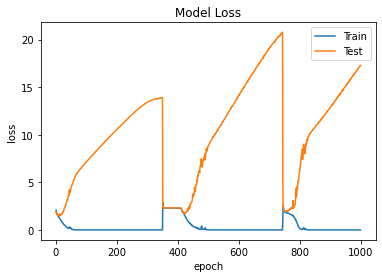

In [79]:
# Save the plot for losses
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Test')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

plt.savefig(
    f'./results/{num_ch_c1}_{num_ch_c2}_SGD_3c_loss.pdf'
)

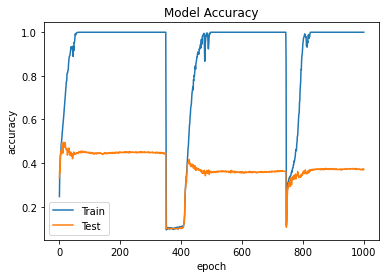

In [80]:
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Train')
plt.plot(range(1, len(test_acc) + 1), test_acc, label='Test')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

plt.savefig(
    f'./results/{num_ch_c1}_{num_ch_c2}_SGD_3c_accuracy.pdf'
)

In [128]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)
epochs = 1000  # Fixed
batch_size = 128  # Fixed
learning_rate = 1e-5

num_ch_c1 = 30  
num_ch_c2 = 100  

model = tf.keras.Sequential()
model.add(layers.Input(shape=(3072, )))
model.add(layers.Reshape(target_shape=(32, 32, 3), input_shape=(3072,)))
model.add(layers.Conv2D(num_ch_c1, 9, activation='relu', input_shape=(None, None, 3), padding="valid"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))
model.add(layers.Conv2D(num_ch_c2, 5, activation='relu', input_shape=(None, None, 3), padding="valid"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))
model.add(layers.Flatten())
model.add(layers.Dense(300, activation = None))
model.add(layers.Dense(10, use_bias=True, input_shape=(300,)))
          
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_25 (Reshape)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 24, 24, 30)        7320      
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 8, 8, 100)         75100     
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 4, 4, 100)         0         
_________________________________________________________________
flatten_25 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_50 (Dense)             (None, 300)             

In [129]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss=loss, metrics='accuracy')
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test))

model.save('models/qn_3c_1e-5.h5')

Epoch 1/1000
79/79 [==============================] - 1s 7ms/step - loss: 2.3031 - accuracy: 0.1198 - val_loss: 2.2766 - val_accuracy: 0.1860
Epoch 2/1000
79/79 [==============================] - 0s 5ms/step - loss: 2.2594 - accuracy: 0.2004 - val_loss: 2.2360 - val_accuracy: 0.2160
Epoch 3/1000
79/79 [==============================] - 0s 5ms/step - loss: 2.2138 - accuracy: 0.2206 - val_loss: 2.1825 - val_accuracy: 0.2300
Epoch 4/1000
79/79 [==============================] - 0s 5ms/step - loss: 2.1557 - accuracy: 0.2359 - val_loss: 2.1229 - val_accuracy: 0.2725
Epoch 5/1000
79/79 [==============================] - 0s 5ms/step - loss: 2.1005 - accuracy: 0.2665 - val_loss: 2.0705 - val_accuracy: 0.2860
Epoch 6/1000
79/79 [==============================] - 0s 5ms/step - loss: 2.0561 - accuracy: 0.2772 - val_loss: 2.0346 - val_accuracy: 0.2990
Epoch 7/1000
79/79 [==============================] - 0s 5ms/step - loss: 2.0223 - accuracy: 0.2913 - val_loss: 2.0027 - val_accuracy: 0.3000
Epoch 

79/79 [==============================] - 0s 5ms/step - loss: 1.5293 - accuracy: 0.4738 - val_loss: 1.5797 - val_accuracy: 0.4610
Epoch 116/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5263 - accuracy: 0.4728 - val_loss: 1.5818 - val_accuracy: 0.4610
Epoch 117/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5278 - accuracy: 0.4761 - val_loss: 1.5841 - val_accuracy: 0.4575
Epoch 118/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5230 - accuracy: 0.4748 - val_loss: 1.5792 - val_accuracy: 0.4605
Epoch 119/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5218 - accuracy: 0.4752 - val_loss: 1.5742 - val_accuracy: 0.4565
Epoch 120/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5190 - accuracy: 0.4737 - val_loss: 1.5742 - val_accuracy: 0.4605
Epoch 121/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5174 - accuracy: 0.4756 - val_loss: 1.5723 - val_accuracy: 0.4610
Epoch 1

Epoch 172/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4382 - accuracy: 0.5042 - val_loss: 1.5261 - val_accuracy: 0.4710
Epoch 173/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4358 - accuracy: 0.5021 - val_loss: 1.5256 - val_accuracy: 0.4830
Epoch 174/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4332 - accuracy: 0.5054 - val_loss: 1.5155 - val_accuracy: 0.4875
Epoch 175/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4324 - accuracy: 0.5060 - val_loss: 1.5185 - val_accuracy: 0.4825
Epoch 176/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4322 - accuracy: 0.5050 - val_loss: 1.5195 - val_accuracy: 0.4855
Epoch 177/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4312 - accuracy: 0.5053 - val_loss: 1.5134 - val_accuracy: 0.4895
Epoch 178/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4303 - accuracy: 0.5058 - val_loss: 1.5149 - val_accuracy:

Epoch 229/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3669 - accuracy: 0.5266 - val_loss: 1.4787 - val_accuracy: 0.4910
Epoch 230/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3658 - accuracy: 0.5273 - val_loss: 1.4764 - val_accuracy: 0.4935
Epoch 231/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3646 - accuracy: 0.5307 - val_loss: 1.4768 - val_accuracy: 0.5025
Epoch 232/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3637 - accuracy: 0.5298 - val_loss: 1.4892 - val_accuracy: 0.4870
Epoch 233/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3600 - accuracy: 0.5304 - val_loss: 1.4802 - val_accuracy: 0.5015
Epoch 234/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3630 - accuracy: 0.5319 - val_loss: 1.4774 - val_accuracy: 0.4930
Epoch 235/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3597 - accuracy: 0.5286 - val_loss: 1.4742 - val_accuracy:

Epoch 286/1000
79/79 [==============================] - 1s 6ms/step - loss: 1.3055 - accuracy: 0.5483 - val_loss: 1.4464 - val_accuracy: 0.5060
Epoch 287/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3049 - accuracy: 0.5521 - val_loss: 1.4627 - val_accuracy: 0.4935
Epoch 288/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3046 - accuracy: 0.5459 - val_loss: 1.4498 - val_accuracy: 0.5010
Epoch 289/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3027 - accuracy: 0.5467 - val_loss: 1.4526 - val_accuracy: 0.5000
Epoch 290/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3041 - accuracy: 0.5498 - val_loss: 1.4564 - val_accuracy: 0.5030
Epoch 291/1000
79/79 [==============================] - 1s 8ms/step - loss: 1.3042 - accuracy: 0.5464 - val_loss: 1.4553 - val_accuracy: 0.5010
Epoch 292/1000
79/79 [==============================] - 1s 8ms/step - loss: 1.3000 - accuracy: 0.5524 - val_loss: 1.4443 - val_accuracy:

Epoch 343/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2533 - accuracy: 0.5687 - val_loss: 1.4343 - val_accuracy: 0.5040
Epoch 344/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2560 - accuracy: 0.5690 - val_loss: 1.4234 - val_accuracy: 0.5140
Epoch 345/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2545 - accuracy: 0.5644 - val_loss: 1.4316 - val_accuracy: 0.5050
Epoch 346/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2507 - accuracy: 0.5688 - val_loss: 1.4233 - val_accuracy: 0.5130
Epoch 347/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2526 - accuracy: 0.5667 - val_loss: 1.4289 - val_accuracy: 0.5060
Epoch 348/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2530 - accuracy: 0.5703 - val_loss: 1.4267 - val_accuracy: 0.5040
Epoch 349/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2500 - accuracy: 0.5682 - val_loss: 1.4279 - val_accuracy:

Epoch 400/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2104 - accuracy: 0.5839 - val_loss: 1.4113 - val_accuracy: 0.5115
Epoch 401/1000
79/79 [==============================] - 1s 6ms/step - loss: 1.2066 - accuracy: 0.5840 - val_loss: 1.4095 - val_accuracy: 0.5095
Epoch 402/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2092 - accuracy: 0.5828 - val_loss: 1.4114 - val_accuracy: 0.5050
Epoch 403/1000
79/79 [==============================] - 1s 6ms/step - loss: 1.2054 - accuracy: 0.5893 - val_loss: 1.4132 - val_accuracy: 0.5050
Epoch 404/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2058 - accuracy: 0.5847 - val_loss: 1.4181 - val_accuracy: 0.5030
Epoch 405/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2088 - accuracy: 0.5829 - val_loss: 1.4076 - val_accuracy: 0.5125
Epoch 406/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2039 - accuracy: 0.5848 - val_loss: 1.4109 - val_accuracy:

Epoch 457/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1689 - accuracy: 0.5992 - val_loss: 1.4054 - val_accuracy: 0.5025
Epoch 458/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1658 - accuracy: 0.5973 - val_loss: 1.3938 - val_accuracy: 0.5100
Epoch 459/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1668 - accuracy: 0.5991 - val_loss: 1.3980 - val_accuracy: 0.5150
Epoch 460/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1646 - accuracy: 0.5993 - val_loss: 1.4025 - val_accuracy: 0.5095
Epoch 461/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1646 - accuracy: 0.6006 - val_loss: 1.3987 - val_accuracy: 0.5045
Epoch 462/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1648 - accuracy: 0.6002 - val_loss: 1.4023 - val_accuracy: 0.5090
Epoch 463/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1649 - accuracy: 0.5961 - val_loss: 1.3929 - val_accuracy:

Epoch 514/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1238 - accuracy: 0.6149 - val_loss: 1.3917 - val_accuracy: 0.5065
Epoch 515/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1248 - accuracy: 0.6150 - val_loss: 1.3932 - val_accuracy: 0.5060
Epoch 516/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1238 - accuracy: 0.6123 - val_loss: 1.3913 - val_accuracy: 0.5100
Epoch 517/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1248 - accuracy: 0.6121 - val_loss: 1.4102 - val_accuracy: 0.5005
Epoch 518/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1285 - accuracy: 0.6104 - val_loss: 1.3938 - val_accuracy: 0.5105
Epoch 519/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1218 - accuracy: 0.6167 - val_loss: 1.3889 - val_accuracy: 0.5125
Epoch 520/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1209 - accuracy: 0.6122 - val_loss: 1.3895 - val_accuracy:

Epoch 571/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0863 - accuracy: 0.6263 - val_loss: 1.3936 - val_accuracy: 0.5065
Epoch 572/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0892 - accuracy: 0.6252 - val_loss: 1.3937 - val_accuracy: 0.5050
Epoch 573/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0886 - accuracy: 0.6291 - val_loss: 1.3897 - val_accuracy: 0.5085
Epoch 574/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0865 - accuracy: 0.6278 - val_loss: 1.3805 - val_accuracy: 0.5140
Epoch 575/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0843 - accuracy: 0.6292 - val_loss: 1.3866 - val_accuracy: 0.5110
Epoch 576/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0861 - accuracy: 0.6285 - val_loss: 1.3894 - val_accuracy: 0.5085
Epoch 577/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0855 - accuracy: 0.6258 - val_loss: 1.3800 - val_accuracy:

Epoch 628/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0488 - accuracy: 0.6427 - val_loss: 1.3831 - val_accuracy: 0.5150
Epoch 629/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0489 - accuracy: 0.6441 - val_loss: 1.3781 - val_accuracy: 0.5110
Epoch 630/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0477 - accuracy: 0.6435 - val_loss: 1.3751 - val_accuracy: 0.5105
Epoch 631/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0474 - accuracy: 0.6425 - val_loss: 1.3779 - val_accuracy: 0.5085
Epoch 632/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0467 - accuracy: 0.6416 - val_loss: 1.3807 - val_accuracy: 0.5100
Epoch 633/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0491 - accuracy: 0.6419 - val_loss: 1.3813 - val_accuracy: 0.5150
Epoch 634/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0436 - accuracy: 0.6415 - val_loss: 1.3780 - val_accuracy:

Epoch 685/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0113 - accuracy: 0.6581 - val_loss: 1.3796 - val_accuracy: 0.5125
Epoch 686/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0119 - accuracy: 0.6560 - val_loss: 1.3771 - val_accuracy: 0.5195
Epoch 687/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0110 - accuracy: 0.6535 - val_loss: 1.3761 - val_accuracy: 0.5160
Epoch 688/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0118 - accuracy: 0.6545 - val_loss: 1.3724 - val_accuracy: 0.5125
Epoch 689/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0099 - accuracy: 0.6593 - val_loss: 1.3858 - val_accuracy: 0.5090
Epoch 690/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0141 - accuracy: 0.6561 - val_loss: 1.3783 - val_accuracy: 0.5120
Epoch 691/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0070 - accuracy: 0.6558 - val_loss: 1.3809 - val_accuracy:

Epoch 742/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9769 - accuracy: 0.6688 - val_loss: 1.3737 - val_accuracy: 0.5165
Epoch 743/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9752 - accuracy: 0.6695 - val_loss: 1.3727 - val_accuracy: 0.5120
Epoch 744/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9748 - accuracy: 0.6691 - val_loss: 1.3731 - val_accuracy: 0.5125
Epoch 745/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9752 - accuracy: 0.6695 - val_loss: 1.3845 - val_accuracy: 0.5120
Epoch 746/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9752 - accuracy: 0.6693 - val_loss: 1.3733 - val_accuracy: 0.5210
Epoch 747/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9707 - accuracy: 0.6724 - val_loss: 1.3734 - val_accuracy: 0.5200
Epoch 748/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9734 - accuracy: 0.6685 - val_loss: 1.3684 - val_accuracy:

Epoch 799/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9407 - accuracy: 0.6800 - val_loss: 1.3701 - val_accuracy: 0.5205
Epoch 800/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9387 - accuracy: 0.6815 - val_loss: 1.3738 - val_accuracy: 0.5180
Epoch 801/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9436 - accuracy: 0.6854 - val_loss: 1.3752 - val_accuracy: 0.5135
Epoch 802/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9357 - accuracy: 0.6849 - val_loss: 1.3737 - val_accuracy: 0.5195
Epoch 803/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9373 - accuracy: 0.6840 - val_loss: 1.3703 - val_accuracy: 0.5225
Epoch 804/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9361 - accuracy: 0.6827 - val_loss: 1.3732 - val_accuracy: 0.5250
Epoch 805/1000
79/79 [==============================] - 1s 8ms/step - loss: 0.9360 - accuracy: 0.6860 - val_loss: 1.3794 - val_accuracy:

Epoch 856/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9093 - accuracy: 0.6968 - val_loss: 1.3862 - val_accuracy: 0.5135
Epoch 857/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9042 - accuracy: 0.6984 - val_loss: 1.3783 - val_accuracy: 0.5185
Epoch 858/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9007 - accuracy: 0.6982 - val_loss: 1.3705 - val_accuracy: 0.5190
Epoch 859/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8998 - accuracy: 0.6982 - val_loss: 1.4022 - val_accuracy: 0.5095
Epoch 860/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9022 - accuracy: 0.6995 - val_loss: 1.3773 - val_accuracy: 0.5140
Epoch 861/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9013 - accuracy: 0.7004 - val_loss: 1.3834 - val_accuracy: 0.5175
Epoch 862/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8997 - accuracy: 0.6960 - val_loss: 1.3989 - val_accuracy:

Epoch 913/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8668 - accuracy: 0.7134 - val_loss: 1.3787 - val_accuracy: 0.5225
Epoch 914/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8650 - accuracy: 0.7127 - val_loss: 1.3768 - val_accuracy: 0.5255
Epoch 915/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8659 - accuracy: 0.7128 - val_loss: 1.3850 - val_accuracy: 0.5145
Epoch 916/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8658 - accuracy: 0.7114 - val_loss: 1.3952 - val_accuracy: 0.5150
Epoch 917/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8705 - accuracy: 0.7104 - val_loss: 1.3759 - val_accuracy: 0.5240
Epoch 918/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8679 - accuracy: 0.7129 - val_loss: 1.3831 - val_accuracy: 0.5235
Epoch 919/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8662 - accuracy: 0.7149 - val_loss: 1.3793 - val_accuracy:

Epoch 970/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8347 - accuracy: 0.7252 - val_loss: 1.3948 - val_accuracy: 0.5210
Epoch 971/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8327 - accuracy: 0.7232 - val_loss: 1.3922 - val_accuracy: 0.5200
Epoch 972/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8339 - accuracy: 0.7273 - val_loss: 1.3917 - val_accuracy: 0.5215
Epoch 973/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8305 - accuracy: 0.7254 - val_loss: 1.3910 - val_accuracy: 0.5150
Epoch 974/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8272 - accuracy: 0.7265 - val_loss: 1.3884 - val_accuracy: 0.5210
Epoch 975/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8326 - accuracy: 0.7240 - val_loss: 1.3999 - val_accuracy: 0.5160
Epoch 976/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8285 - accuracy: 0.7243 - val_loss: 1.3836 - val_accuracy:

In [130]:
mean_acc = np.mean(history.history['val_accuracy'][-10:])
print("mean accuracy for last 10 epochs: " + str(mean_acc*100) +"%")

mean accuracy for last 10 epochs: 52.09499955177307%


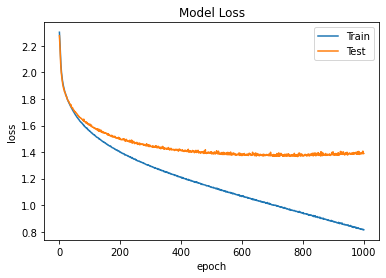

In [131]:
# Save the plot for losses
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Test')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

plt.savefig(
    f'./results/{num_ch_c1}_{num_ch_c2}_SGD_3c_loss_1e-5pdf'
)

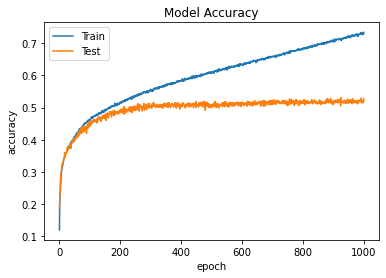

In [132]:
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Train')
plt.plot(range(1, len(test_acc) + 1), test_acc, label='Test')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

plt.savefig(
    f'./results/{num_ch_c1}_{num_ch_c2}_SGD_3c_accuracy_1e-5.pdf'
)

## Part A: Object Recognition Question 3d)

In [32]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)
epochs = 1000  # Fixed
batch_size = 128  # Fixed
learning_rate = 0.001

num_ch_c1 = 30  
num_ch_c2 = 100  

model = tf.keras.Sequential()
model.add(layers.Input(shape=(3072, )))
model.add(layers.Reshape(target_shape=(32, 32, 3), input_shape=(3072,)))
model.add(layers.Conv2D(num_ch_c1, 9, activation='relu', input_shape=(None, None, 3), padding="valid"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))
model.add(layers.Conv2D(num_ch_c2, 5, activation='relu', input_shape=(None, None, 3), padding="valid"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))
model.add(layers.Flatten())
model.add(layers.Dense(300, activation = None))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(10, use_bias=True, input_shape=(300,)))
          
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 30)        7320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 100)         75100     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 100)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 100)        

In [117]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss=loss, metrics='accuracy')
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test))

model.save('models/qn_3d.h5')

Epoch 1/1000
79/79 [==============================] - 0s 6ms/step - loss: 2.3329 - accuracy: 0.1002 - val_loss: 2.2970 - val_accuracy: 0.1045
Epoch 2/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.3028 - accuracy: 0.1096 - val_loss: 2.2860 - val_accuracy: 0.1355
Epoch 3/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.2929 - accuracy: 0.1200 - val_loss: 2.2789 - val_accuracy: 0.1995
Epoch 4/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.2861 - accuracy: 0.1276 - val_loss: 2.2731 - val_accuracy: 0.2095
Epoch 5/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.2789 - accuracy: 0.1455 - val_loss: 2.2672 - val_accuracy: 0.2160
Epoch 6/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.2699 - accuracy: 0.1563 - val_loss: 2.2611 - val_accuracy: 0.2280
Epoch 7/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.2639 - accuracy: 0.1619 - val_loss: 2.2546 - val_accuracy: 0.2205
Epoch 

79/79 [==============================] - 0s 4ms/step - loss: 1.9151 - accuracy: 0.3080 - val_loss: 1.8798 - val_accuracy: 0.3305
Epoch 59/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.9039 - accuracy: 0.3174 - val_loss: 1.8875 - val_accuracy: 0.3265
Epoch 60/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.9053 - accuracy: 0.3128 - val_loss: 1.8684 - val_accuracy: 0.3380
Epoch 61/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.8959 - accuracy: 0.3261 - val_loss: 1.8696 - val_accuracy: 0.3335
Epoch 62/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.8941 - accuracy: 0.3248 - val_loss: 1.8833 - val_accuracy: 0.3330
Epoch 63/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.8909 - accuracy: 0.3236 - val_loss: 1.8714 - val_accuracy: 0.3375
Epoch 64/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.8815 - accuracy: 0.3313 - val_loss: 1.8673 - val_accuracy: 0.3380
Epoch 65/1000

Epoch 172/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.6546 - accuracy: 0.4131 - val_loss: 1.6482 - val_accuracy: 0.4270
Epoch 173/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.6534 - accuracy: 0.4194 - val_loss: 1.6753 - val_accuracy: 0.4110
Epoch 174/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.6558 - accuracy: 0.4079 - val_loss: 1.6390 - val_accuracy: 0.4290
Epoch 175/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.6498 - accuracy: 0.4182 - val_loss: 1.6755 - val_accuracy: 0.4045
Epoch 176/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.6486 - accuracy: 0.4112 - val_loss: 1.6490 - val_accuracy: 0.4265
Epoch 177/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.6470 - accuracy: 0.4135 - val_loss: 1.6547 - val_accuracy: 0.4055
Epoch 178/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.6469 - accuracy: 0.4164 - val_loss: 1.6695 - val_accuracy:

Epoch 229/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5773 - accuracy: 0.4480 - val_loss: 1.7430 - val_accuracy: 0.4070
Epoch 230/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5738 - accuracy: 0.4391 - val_loss: 1.5917 - val_accuracy: 0.4440
Epoch 231/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5748 - accuracy: 0.4392 - val_loss: 1.6273 - val_accuracy: 0.4305
Epoch 232/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5747 - accuracy: 0.4422 - val_loss: 1.5829 - val_accuracy: 0.4435
Epoch 233/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5744 - accuracy: 0.4419 - val_loss: 1.7989 - val_accuracy: 0.3795
Epoch 234/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5745 - accuracy: 0.4469 - val_loss: 1.6700 - val_accuracy: 0.4260
Epoch 235/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5727 - accuracy: 0.4420 - val_loss: 1.6669 - val_accuracy:

Epoch 286/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5162 - accuracy: 0.4620 - val_loss: 1.5255 - val_accuracy: 0.4810
Epoch 287/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5041 - accuracy: 0.4669 - val_loss: 1.5883 - val_accuracy: 0.4445
Epoch 288/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5068 - accuracy: 0.4709 - val_loss: 1.5522 - val_accuracy: 0.4580
Epoch 289/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5042 - accuracy: 0.4669 - val_loss: 1.5338 - val_accuracy: 0.4710
Epoch 290/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5061 - accuracy: 0.4684 - val_loss: 1.5294 - val_accuracy: 0.4840
Epoch 291/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5041 - accuracy: 0.4697 - val_loss: 1.7436 - val_accuracy: 0.4090
Epoch 292/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5025 - accuracy: 0.4701 - val_loss: 1.5382 - val_accuracy:

Epoch 399/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3983 - accuracy: 0.5066 - val_loss: 1.5586 - val_accuracy: 0.4635
Epoch 400/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4008 - accuracy: 0.5109 - val_loss: 1.4623 - val_accuracy: 0.5005
Epoch 401/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4023 - accuracy: 0.5114 - val_loss: 1.7866 - val_accuracy: 0.3725
Epoch 402/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3986 - accuracy: 0.5113 - val_loss: 1.5032 - val_accuracy: 0.4810
Epoch 403/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4011 - accuracy: 0.5101 - val_loss: 1.4925 - val_accuracy: 0.4795
Epoch 404/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4042 - accuracy: 0.5096 - val_loss: 1.6783 - val_accuracy: 0.4295
Epoch 405/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3973 - accuracy: 0.5124 - val_loss: 1.4607 - val_accuracy:

Epoch 456/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3492 - accuracy: 0.5291 - val_loss: 1.6239 - val_accuracy: 0.4325
Epoch 457/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3517 - accuracy: 0.5263 - val_loss: 1.5158 - val_accuracy: 0.4695
Epoch 458/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3521 - accuracy: 0.5253 - val_loss: 1.4415 - val_accuracy: 0.5030
Epoch 459/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3400 - accuracy: 0.5330 - val_loss: 1.4440 - val_accuracy: 0.4995
Epoch 460/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3434 - accuracy: 0.5250 - val_loss: 1.5157 - val_accuracy: 0.4845
Epoch 461/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3530 - accuracy: 0.5265 - val_loss: 1.5831 - val_accuracy: 0.4590
Epoch 462/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3487 - accuracy: 0.5285 - val_loss: 1.5308 - val_accuracy:

Epoch 569/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2603 - accuracy: 0.5569 - val_loss: 1.4068 - val_accuracy: 0.5100
Epoch 570/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2608 - accuracy: 0.5643 - val_loss: 1.4482 - val_accuracy: 0.5045
Epoch 571/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2544 - accuracy: 0.5594 - val_loss: 1.4113 - val_accuracy: 0.5150
Epoch 572/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2534 - accuracy: 0.5587 - val_loss: 1.4482 - val_accuracy: 0.5035
Epoch 573/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2578 - accuracy: 0.5568 - val_loss: 1.4080 - val_accuracy: 0.5180
Epoch 574/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2553 - accuracy: 0.5624 - val_loss: 1.4218 - val_accuracy: 0.5070
Epoch 575/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2594 - accuracy: 0.5586 - val_loss: 1.4471 - val_accuracy:

Epoch 626/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2103 - accuracy: 0.5771 - val_loss: 1.4231 - val_accuracy: 0.5045
Epoch 627/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2065 - accuracy: 0.5736 - val_loss: 1.4011 - val_accuracy: 0.5110
Epoch 628/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2104 - accuracy: 0.5804 - val_loss: 1.4017 - val_accuracy: 0.5090
Epoch 629/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2059 - accuracy: 0.5747 - val_loss: 1.4614 - val_accuracy: 0.4910
Epoch 630/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2105 - accuracy: 0.5770 - val_loss: 1.4755 - val_accuracy: 0.4885
Epoch 631/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2102 - accuracy: 0.5749 - val_loss: 1.4087 - val_accuracy: 0.5170
Epoch 632/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2056 - accuracy: 0.5828 - val_loss: 1.4588 - val_accuracy:

Epoch 683/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1644 - accuracy: 0.5953 - val_loss: 1.5962 - val_accuracy: 0.4595
Epoch 684/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1667 - accuracy: 0.5926 - val_loss: 1.6217 - val_accuracy: 0.4365
Epoch 685/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1691 - accuracy: 0.5886 - val_loss: 1.4175 - val_accuracy: 0.5030
Epoch 686/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1587 - accuracy: 0.5950 - val_loss: 1.4751 - val_accuracy: 0.4930
Epoch 687/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1570 - accuracy: 0.5961 - val_loss: 1.3996 - val_accuracy: 0.5260
Epoch 688/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1700 - accuracy: 0.5893 - val_loss: 1.5270 - val_accuracy: 0.4890
Epoch 689/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1624 - accuracy: 0.5938 - val_loss: 1.7716 - val_accuracy:

Epoch 796/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0691 - accuracy: 0.6275 - val_loss: 1.4142 - val_accuracy: 0.5025
Epoch 797/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0683 - accuracy: 0.6268 - val_loss: 1.4730 - val_accuracy: 0.4880
Epoch 798/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0682 - accuracy: 0.6268 - val_loss: 1.3793 - val_accuracy: 0.5190
Epoch 799/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0701 - accuracy: 0.6200 - val_loss: 1.4096 - val_accuracy: 0.5090
Epoch 800/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0660 - accuracy: 0.6317 - val_loss: 1.4051 - val_accuracy: 0.5250
Epoch 801/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0727 - accuracy: 0.6263 - val_loss: 1.3485 - val_accuracy: 0.5350
Epoch 802/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0676 - accuracy: 0.6291 - val_loss: 1.3786 - val_accuracy:

Epoch 909/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9822 - accuracy: 0.6617 - val_loss: 1.4276 - val_accuracy: 0.5155
Epoch 910/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9714 - accuracy: 0.6628 - val_loss: 1.4344 - val_accuracy: 0.5030
Epoch 911/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9760 - accuracy: 0.6615 - val_loss: 1.3267 - val_accuracy: 0.5365
Epoch 912/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9695 - accuracy: 0.6627 - val_loss: 1.3379 - val_accuracy: 0.5290
Epoch 913/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9700 - accuracy: 0.6639 - val_loss: 1.3649 - val_accuracy: 0.5340
Epoch 914/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9700 - accuracy: 0.6580 - val_loss: 1.5583 - val_accuracy: 0.4785
Epoch 915/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9694 - accuracy: 0.6650 - val_loss: 1.4911 - val_accuracy:

Epoch 966/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9188 - accuracy: 0.6792 - val_loss: 1.4493 - val_accuracy: 0.4965
Epoch 967/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9274 - accuracy: 0.6789 - val_loss: 1.4118 - val_accuracy: 0.4990
Epoch 968/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9247 - accuracy: 0.6772 - val_loss: 1.4504 - val_accuracy: 0.5090
Epoch 969/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9256 - accuracy: 0.6822 - val_loss: 1.6626 - val_accuracy: 0.4375
Epoch 970/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9233 - accuracy: 0.6849 - val_loss: 1.3791 - val_accuracy: 0.5260
Epoch 971/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9189 - accuracy: 0.6814 - val_loss: 1.4095 - val_accuracy: 0.5115
Epoch 972/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9193 - accuracy: 0.6824 - val_loss: 1.4560 - val_accuracy:

In [118]:
mean_acc = np.mean(history.history['val_accuracy'][-10:])
print("mean accuracy for last 10 epochs: " + str(mean_acc*100) +"%")

mean accuracy for last 10 epochs: 49.75500047206879%


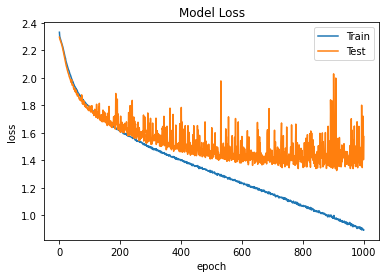

In [89]:
# Save the plot for losses
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Test')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

plt.savefig(
    f'./results/{num_ch_c1}_{num_ch_c2}_SGD_3d_loss.pdf'
)

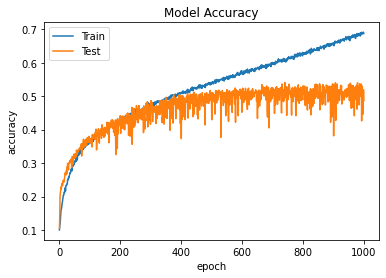

In [90]:
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Train')
plt.plot(range(1, len(test_acc) + 1), test_acc, label='Test')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

plt.savefig(
    f'./results/{num_ch_c1}_{num_ch_c2}_SGD_3d_accuracy.pdf'
)